# **PROJECT : CREDIT SCORE CLASSIFICATION**


### Presented by SINSAGAR K


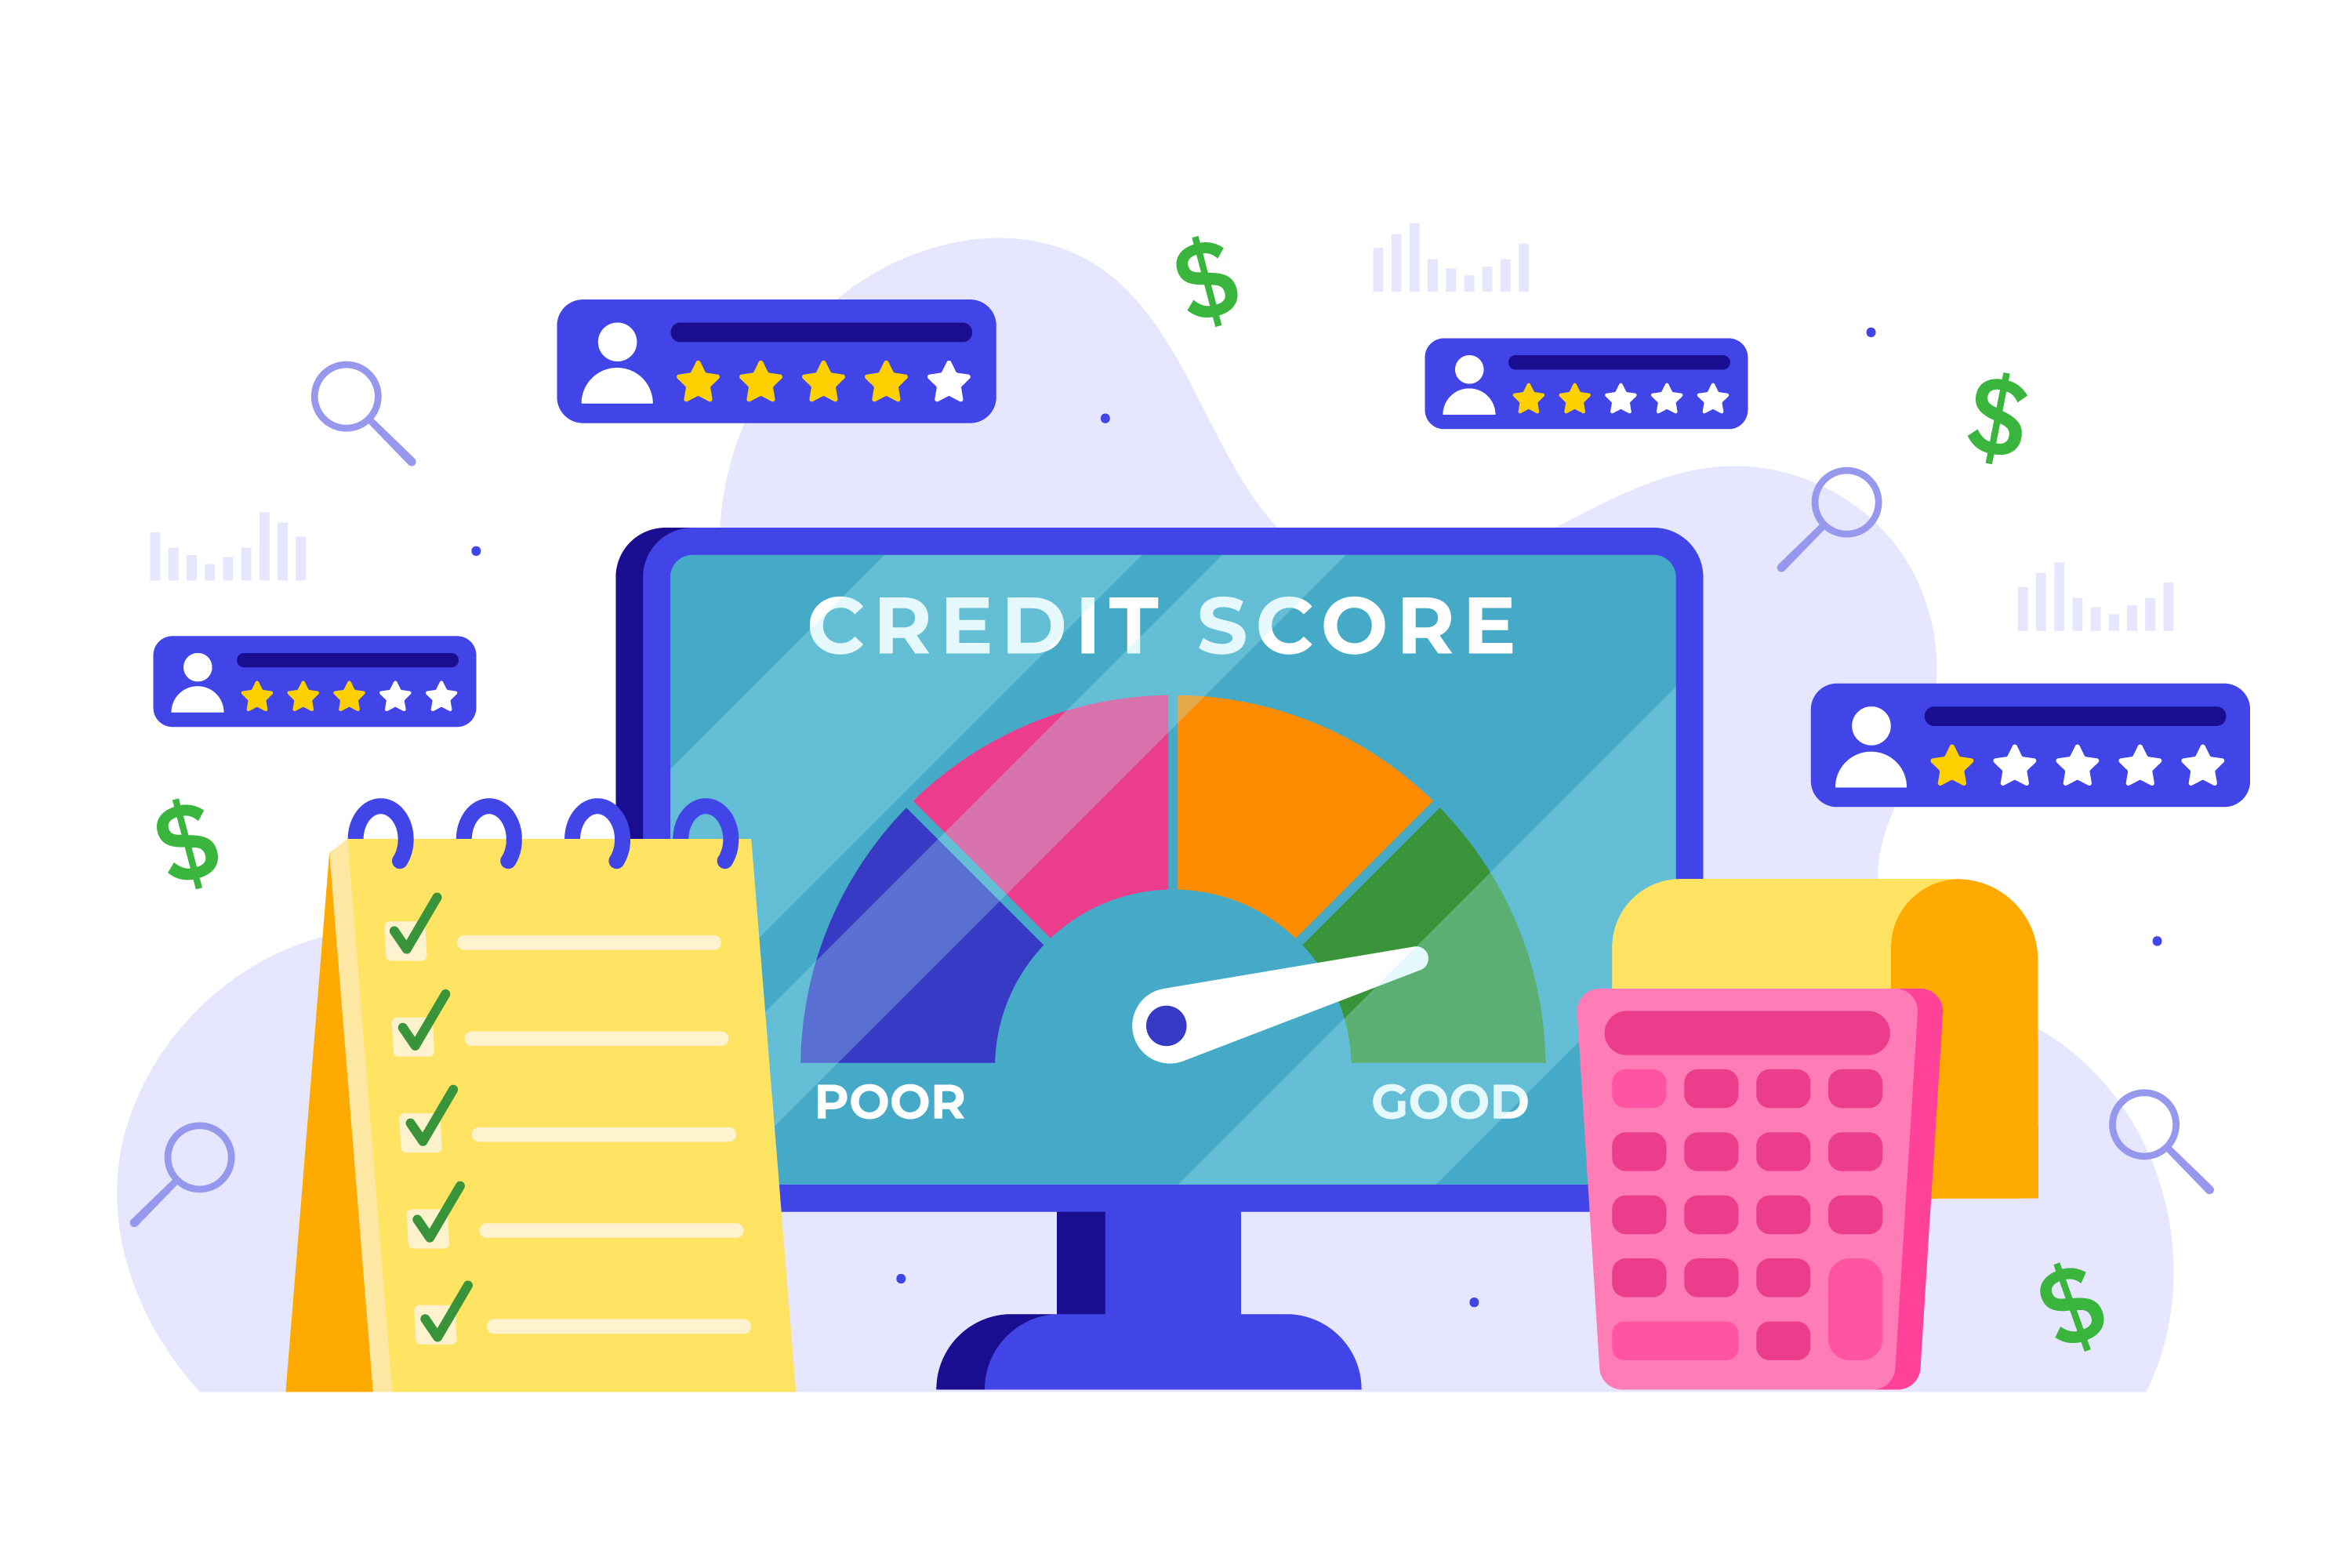

In [1]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='CREDIT_SCORE.JPG',height=1300,width=900))

## **Introduction:**  
The Credit Score Classification project is important because it helps create a system for sorting people's credit scores into different categories. This is really useful for banks and other financial organizations when they want to decide whether to lend money to someone or not. They rely on these categories to reduce the chances of people not paying back their loans. 

This system is also used by online services like Paytm and Amazon Pay to figure out if users are trustworthy when it comes to handling money. It helps these platforms offer special financial services to users and make sure their transactions go smoothly. So, in simpler terms, this project helps banks and online services make smart decisions about money lending and services for their users.

1) Business Problem

What factors and variables contribute the most to determining credit scores?
Do certain professions with high monthly income have better credit scores than others?
Is it possible to predict a credit score of an individual based on specific attributes?

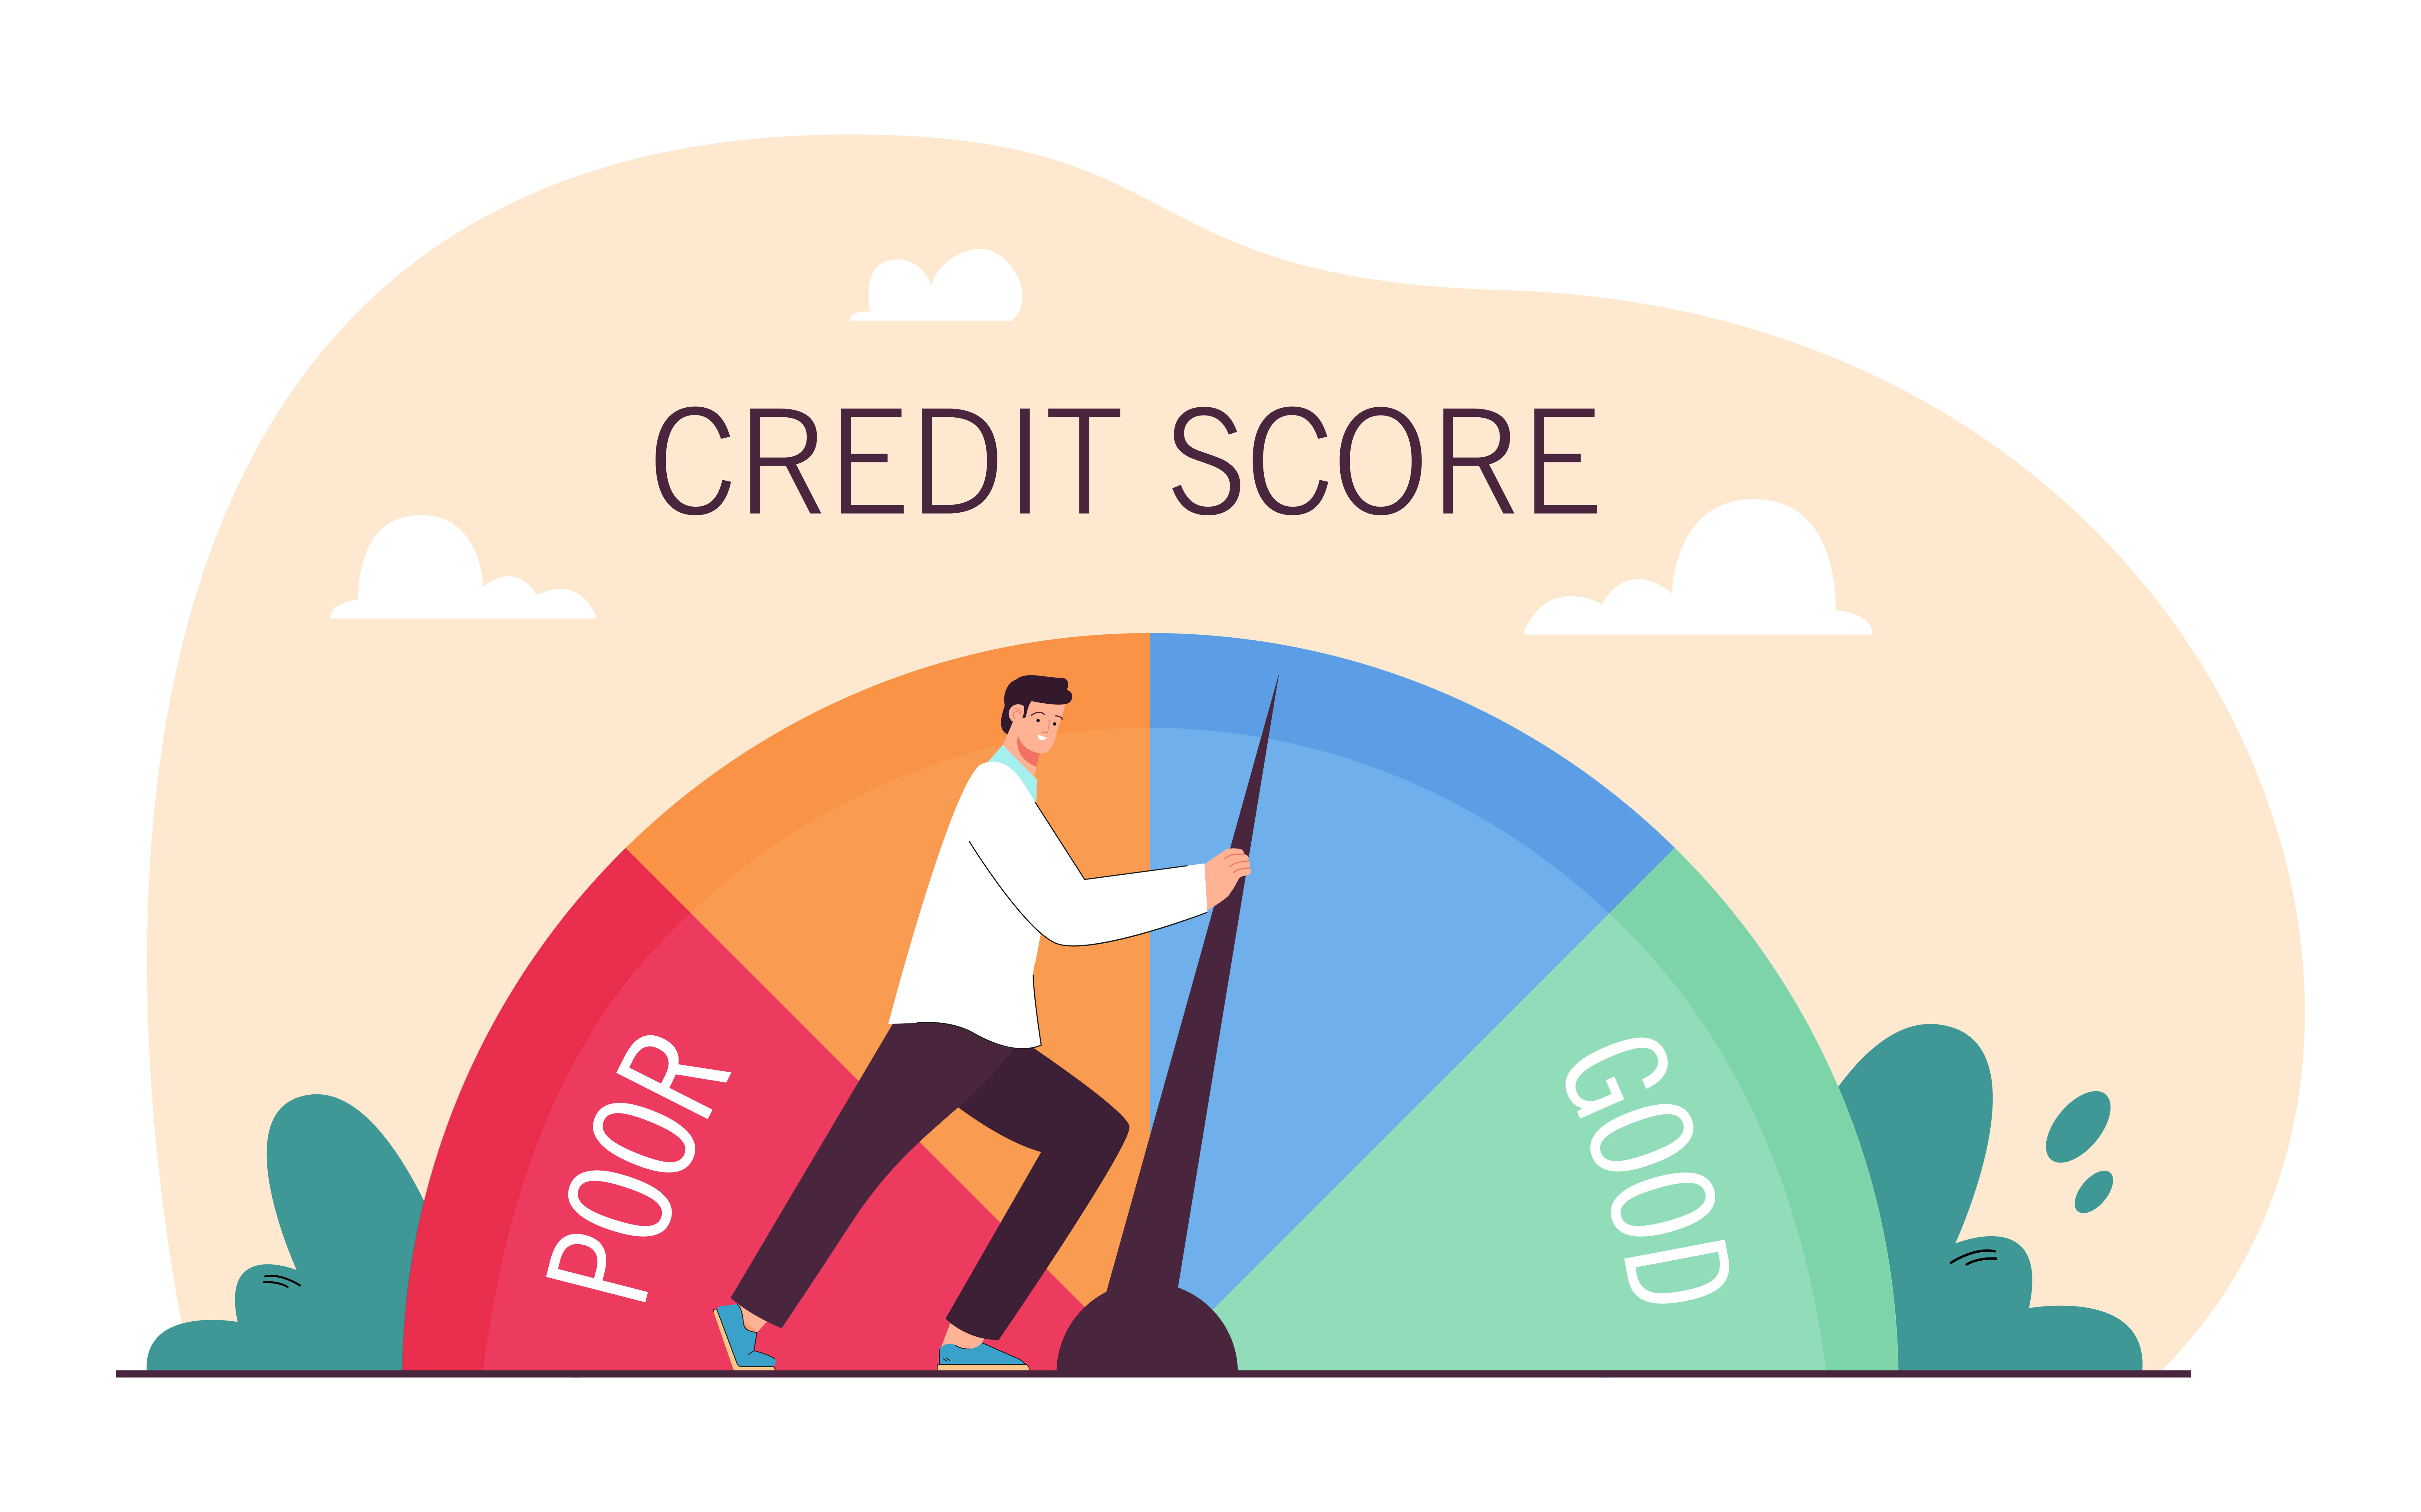

In [2]:
display(Image(filename='credit_image.JPG',height=1300,width=700))

**Project Goals:**
>- Develop a robust multi-class classification model for credit score prediction.
>- Enhance data quality by addressing missing values, duplicates, and inconsistent entries.
>- Prepare the dataset for modeling through data transformation
>- Evaluate and select the best-performing machine learning algorithm for credit score classification.
>- Ensure model effectiveness through comprehensive evaluation metrics.


**Project Steps:**

1. **Exploratory Data Analysis (EDA):**
   - Conducted initial data exploration to gain insights into the dataset.
   - Identified potential issues such as missing values and special characters in columns.

2. **Data Cleaning:**
   - Addressed missing values in columns like 'Credit History Age' 'Monthly Inhand Salary,' 'Type of Loan,' etc.
   - Handled special characters, outliers, and unusual data points for improved data quality.

3. **Data Transformation:**
   - Transformed data types for columns like 'Annual Income,' 'Credit History Age,' and 'Monthly Balance.'etc
   - Ensured consistency and compatibility of data types for analysis and modeling.

4. **Exploratory Data Analysis (Continued):**
   - Further explored the dataset to visualize data distributions and relationships.
   - Identified potential features that could influence credit score classification.

5. **Model Building and Evaluation:**
   - Implemented multiple machine learning algorithms, including random forests and KNN.
   - Addressed class imbalance through oversampling using SMOTE.
   - Evaluated model performance using metrics like precision, recall, F1-score, and accuracy.

6. **Model Selection:**
   - Selected the best-performing machine learning algorithm for credit score classification based on evaluation metrics.
   - Fine-tuned hyperparameters to optimize model performance.





## IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## LOADING DATASET

In [4]:
df=pd.read_csv(r"C:\Users\jhonn\Downloads\train.csv",low_memory=False)
df.head(20)

ID Customer_ID     Month             Name   Age          SSN  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2   0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7   0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8   0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj    28  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj    28  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj    28  004-07-5839   
13  0x1613  CUS_0x21b1      June  Rick Rothackerj    28  004-07-5839   
14  0x1614  CUS_0x21b1      July  Rick Rothackerj    28  004-07-5839   
15  0x1615  CUS_0x21b1    August  Rick Rothackerj    28  004-07-5839   
16  0x161a  CUS_0x2dbc   January           Langep    34  486-85-3974   
17  0x161b  CUS_0x2dbc  February              NaN    34  486-85-3974   
18  0x161c  CUS_0x2dbc     March           Langep    34  486-85-3974   
19  0x161d  CUS_0x2dbc     April           Langep    34  486-85-3974   

   Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0   Scientist      19114.12            1824.843333                  3  ...   
1   Scientist      19114.12                    NaN                  3  ...   
2   Scientist      19114.12                    NaN                  3  ...   
3   Scientist      19114.12                    NaN                  3  ...   
4   Scientist      19114.12            1824.843333                  3  ...   
5   Scientist      19114.12                    NaN                  3  ...   
6   Scientist      19114.12            1824.843333                  3  ...   
7   Scientist      19114.12            1824.843333                  3  ...   
8     _______      34847.84            3037.986667                  2  ...   
9     Teacher      34847.84            3037.986667                  2  ...   
10    Teacher     34847.84_            3037.986667                  2  ...   
11    Teacher      34847.84                    NaN                  2  ...   
12    Teacher      34847.84            3037.986667                  2  ...   
13    Teacher      34847.84            3037.986667                  2  ...   
14    Teacher      34847.84                    NaN                  2  ...   
15    Teacher      34847.84            3037.986667                  2  ...   
16    _______     143162.64           12187.220000                  1  ...   
17   Engineer     143162.64           12187.220000                  1  ...   
18    _______     143162.64                    NaN                  1  ...   
19   Engineer     143162.64           12187.220000                  1  ...   

    Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0            _            809.98                26.822620   
1         Good            809.98                31.944960   
2         Good            809.98                28.609352   
3         Good            809.98                31.377862   
4         Good            809.98                24.797347   
5         Good            809.98                27.262259   
6         Good            809.98                22.537593   
7         Good            809.98                23.933795   
8         Good            605.03                24.464031   
9         Good            605.03                38.550848   
10           _            605.03                33.224951   
11        Good            605.03                39.182656   
12        Good            605.03                34.977895   
13

In [5]:
df.tail(10)

ID Customer_ID     Month            Name Age          SSN  \
99990  0x25fe0  CUS_0x8600      July  Sarah McBridec  28  031-35-0942   
99991  0x25fe1  CUS_0x8600    August  Sarah McBridec  29  031-35-0942   
99992  0x25fe6  CUS_0x942c   January           Nicks  24  078-73-5990   
99993  0x25fe7  CUS_0x942c  February           Nicks  25  078-73-5990   
99994  0x25fe8  CUS_0x942c     March           Nicks  25  078-73-5990   
99995  0x25fe9  CUS_0x942c     April           Nicks  25  078-73-5990   
99996  0x25fea  CUS_0x942c       May           Nicks  25  078-73-5990   
99997  0x25feb  CUS_0x942c      June           Nicks  25  078-73-5990   
99998  0x25fec  CUS_0x942c      July           Nicks  25  078-73-5990   
99999  0x25fed  CUS_0x942c    August           Nicks  25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
99990  Architect      20002.88            1929.906667                 10  ...   
99991  Architect      20002.88            1929.906667                 10  ...   
99992   Mechanic      39628.99            3359.415833                  4  ...   
99993   Mechanic     39628.99_            3359.415833                  4  ...   
99994   Mechanic      39628.99            3359.415833                  4  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
99990         Bad            3571.7                25.123535   
99991         Bad            3571.7                37.140784   
99992           _            502.38                32.991333   
99993        Good            502.38                29.135447   
99994           _            502.38                39.323569   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
99990                     NaN                    Yes           60.964772   
99991    6 Years and 3 Months                    Yes           60.964772   
99992   31 Years and 3 Months                     No           35.104023   
99993   31 Years and 4 Months                     No        58638.000000   
99994   31 Years and 5 Months                     No           35.104023   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
99990       173.2755025599617    Low_spent_Large_value_payments   
99991       34.66290609052614   High_spent_Large_value_payments   
99992       401.1964806036356    Low_spent_Small_value_payments   
99993       180.7330951944497   Low_spent_Medium_value_payments   
99994      140.58140274528395  High_spent_Medium_value_payments   
99995       60.97133255718485   High_spent_Large_value_payments   
99996       54.18595028760385  High_spent_Medium_value_payments   
99997       24.02847744864441   High_spent_Large_value_payments   
99998      251.67258219721603    Low_spent_Large_value_payments   
99999       167.1638651610451                            !@9#%8   

          Monthly_Balance Credit_Sco

In [6]:
df.shape

(100000, 28)

In [7]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

> **Data Description**
>* ID: Unique ID of the record
>* Customer_ID: Unique ID of the customer
>* Month: Month of the year
>* Name: The name of the person
>* Age: The age of the person
>* SSN: Social Security Number of the person
>* Occupation: The occupation of the person
>* Annual_Income: The Annual Income of the person
>* Monthly_Inhand_Salary: Monthly in-hand salary of the person
>* Num_Bank_Accounts: The number of bank accounts of the person
>* Num_Credit_Card: Number of credit cards the person is having
>* Interest_Rate: The interest rate on the credit card of the person
>* Num_of_Loan: The number of loans taken by the person from the bank
>* Type_of_Loan: The types of loans taken by the person from the bank
>* Delay_from_due_date: The average number of days delayed by the person from the date of payment
>* Num_of_Delayed_Payment: Number of payments delayed by the person
>* Changed_Credit_Card: The percentage change in the credit card limit of the person
>* Num_Credit_Inquiries: The number of credit card inquiries by the person
>* Credit_Mix: Classification of Credit Mix of the customer
>* Outstanding_Debt: The outstanding balance of the person
>* Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
>* Credit_History_Age: The age of the credit history of the person
>* Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
>* Total_EMI_per_month: The total EMI per month of the person
>* Amount_invested_monthly: The monthly amount invested by the person
>* Payment_Behaviour: The payment behaviour of the person
>* Monthly_Balance: The monthly balance left in the account of the person
>* Credit_Score: The credit score of the person

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
#calculating missing value counts
df.isna().sum().sort_values(ascending=False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

In [10]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [11]:
df.duplicated().sum()

0

In [12]:
#checking statistical values
df.describe(include='all').T

count  unique                               top  \
ID                          100000  100000                            0x1602   
Customer_ID                 100000   12500                         CUS_0xd40   
Month                       100000       8                           January   
Name                         90015   10139                            Langep   
Age                         100000    1788                                38   
SSN                         100000   12501                         #F%$D@*&8   
Occupation                  100000      16                           _______   
Annual_Income               100000   18940                          36585.12   
Monthly_Inhand_Salary      84998.0     NaN                               NaN   
Num_Bank_Accounts         100000.0     NaN                               NaN   
Num_Credit_Card           100000.0     NaN                               NaN   
Interest_Rate             100000.0     NaN                               NaN   
Num_of_Loan                 100000     434                                 3   
Type_of_Loan                 88592    6260                     Not Specified   
Delay_from_due_date       100000.0     NaN                               NaN   
Num_of_Delayed_Payment       92998     749                                19   
Changed_Credit_Limit        100000    4384                                 _   
Num_Credit_Inquiries       98035.0     NaN                               NaN   
Credit_Mix                  100000       4                          Standard   
Outstanding_Debt            100000   13178                           1360.45   
Credit_Utilization_Ratio  100000.0     NaN                               NaN   
Credit_History_Age           90970     404            15 Years and 11 Months   
Payment_of_Min_Amount       100000       3                               Yes   
Total_EMI_per_month       100000.0     NaN                               NaN   
Amount_invested_monthly      95521   91049                         __10000__   
Payment_Behaviour           100000       7    Low_spent_Small_value_payments   
Monthly_Balance              98800   98792  __-333333333333333333333333333__   
Credit_Score                100000       3                          Standard   

                           freq         mean          std         min  \
ID                            1          NaN          NaN         NaN   
Customer_ID                   8          NaN          NaN         NaN   
Month                     12500          NaN          NaN         NaN   
Name                         44          NaN          NaN         NaN   
Age                        2833          NaN          NaN         NaN   
SSN                        5572          NaN          NaN         NaN   
Occupation                 7062          NaN          NaN         NaN   
Annual_Income                16          NaN          NaN         NaN   
Monthly_Inhand_Salary       NaN   4194.17085  3183.686167  303.645417   
Num_Bank_Accounts           NaN     17.09128   117.404834        -1.0   
Num_Credit_Card             NaN     22.47443    129.05741         0.0   
Interest_Rate               NaN     72.46604   466.422621         1.0   
Num_of_Loan               14386          NaN          NaN         NaN   
Type_of_Loan               1408          NaN          NaN         NaN   
Delay_from_due_date         NaN     21.06878    14.860104        -5.0   
Num_of_Delayed_Payment     5327          NaN          NaN         NaN   
Changed_Credit_Limit       2091          NaN          NaN         NaN   
Num_Credit_Inquiries        NaN    27.754251   193.177339         0.0   
Credit_Mix                36479          NaN          NaN         NaN   
Outstanding_Debt             24          NaN          NaN         NaN   
Credit_Utilization_Ratio    NaN    32.285173     5.116875        20.0   
Credit_History_Age          446          NaN          NaN         NaN   
Payment_of_Min_Amount     523

**Observations:**

1. There are missing Values in some of the columns:
   Name; Monthly Inhand Salary; Type of Loan, etc.

1. The dataset has both numerical and string values.

1. Some values potentially need data type transformation
   Annual Income, Credit History Age, Monthly Balance, on a first glance.
   
1. Special Values: You can notice special values like "-333333333333333333333333333", and "10000" in columns like "Monthly_Balance" and "Amount_invested_monthly." These could indicate outliers or unusual data points.

1. There are so many unusal data points like #F%$D@*&8,__10000__,_______ etc



In [13]:
df.drop(['ID','Customer_ID','Month','Name','SSN','Occupation','Amount_invested_monthly'],axis=1,inplace=True)
df.head(5)

Age Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0    23      19114.12            1824.843333                  3   
1    23      19114.12                    NaN                  3   
2  -500      19114.12                    NaN                  3   
3    23      19114.12                    NaN                  3   
4    23      19114.12            1824.843333                  3   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                4              3           4   
1                4              3           4   
2                4              3           4   
3                4              3           4   
4                4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment  ... Num_Credit_Inquiries  Credit_Mix  \
0                      7  ...                  4.0           _   
1                    NaN  ...                  4.0        Good   
2                      7  ...                  4.0        Good   
3                      4  ...                  4.0        Good   
4                    NaN  ...                  4.0        Good   

  Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0           809.98                26.822620  22 Years and 1 Months   
1           809.98                31.944960                    NaN   
2           809.98                28.609352  22 Years and 3 Months   
3           809.98                31.377862  22 Years and 4 Months   
4           809.98                24.797347  22 Years and 5 Months   

  Payment_of_Min_Amount Total_EMI_per_month                 Payment_Behaviour  \
0                    No           49.574949   High_spent_Small_value_payments   
1                    No           49.574949    Low_spent_Large_value_payments   
2                    No           49.574949   Low_spent_Medium_value_payments   
3                    No           49.574949    Low_spent_Small_value_payments   
4                    No           49.574949  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  

[5 rows x 21 columns]

In [14]:
df.shape

(100000, 21)

In [15]:
df.isnull().sum().reset_index().rename(columns={'index':'feature name',0:'nullcount'})

feature name  nullcount
0                        Age          0
1              Annual_Income          0
2      Monthly_Inhand_Salary      15002
3          Num_Bank_Accounts          0
4            Num_Credit_Card          0
5              Interest_Rate          0
6                Num_of_Loan          0
7               Type_of_Loan      11408
8        Delay_from_due_date          0
9     Num_of_Delayed_Payment       7002
10      Changed_Credit_Limit          0
11      Num_Credit_Inquiries       1965
12                Credit_Mix          0
13          Outstanding_Debt          0
14  Credit_Utilization_Ratio          0
15        Credit_History_Age       9030
16     Payment_of_Min_Amount          0
17       Total_EMI_per_month          0
18         Payment_Behaviour          0
19           Monthly_Balance       1200
20              Credit_Score          0

In [16]:
missing_data=df.isnull()

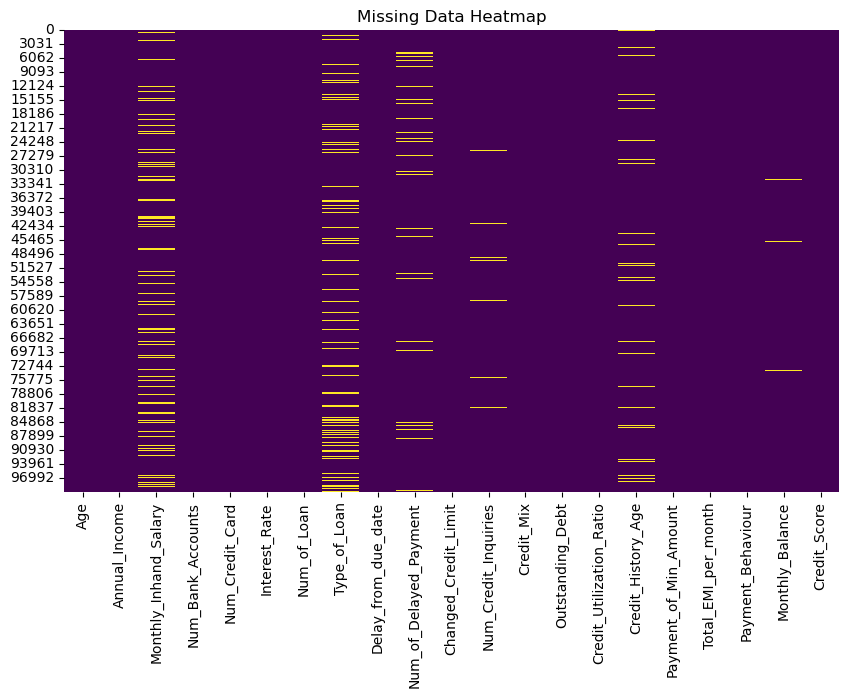

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(missing_data,cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

In [18]:
df.dtypes

Age                          object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

## Categorical values

### Credit Mix

<Axes: xlabel='Credit_Mix', ylabel='count'>

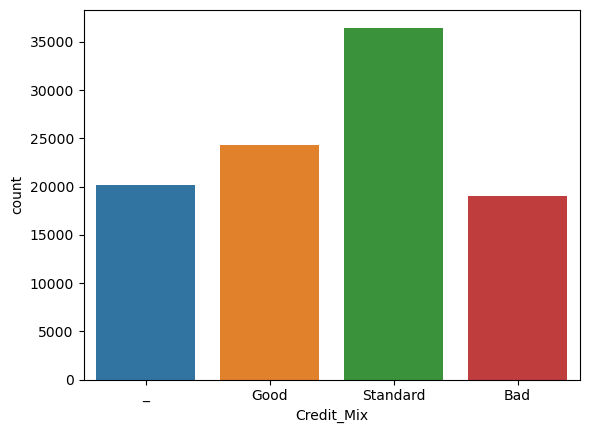

In [19]:
sns.countplot(x=df['Credit_Mix'])

>* There are 3 types of Credit Mix - Standard, Good, Bad
>* Approximately 20,000 records in the "Credit Mix" column have been marked with a garbage value, represented as an underscore      "_".
>* Replacing '_' with Not Specified


In [20]:
df['Credit_Mix']=df['Credit_Mix'].replace('_','Not Specified')
df['Credit_Mix'].unique()

array(['Not Specified', 'Good', 'Standard', 'Bad'], dtype=object)

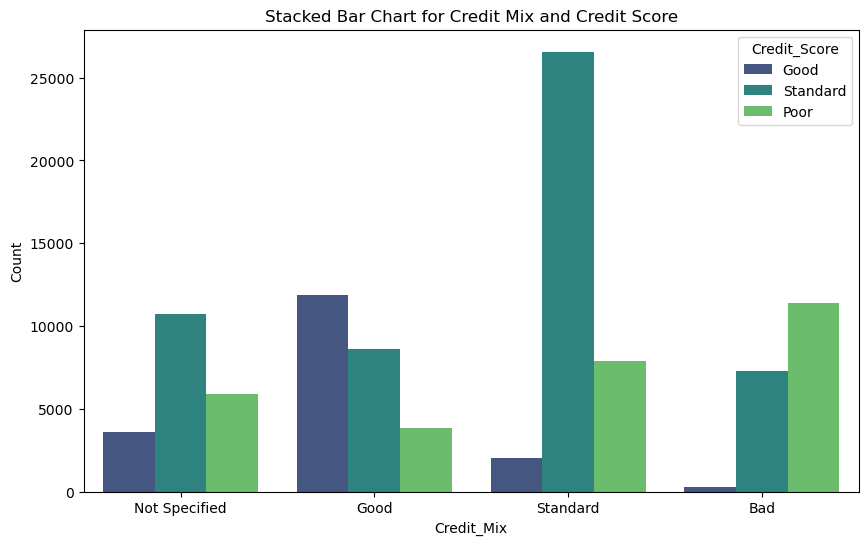

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['Credit_Mix'], hue='Credit_Score', palette='viridis')
plt.xticks(rotation=0)
plt.xlabel('Credit_Mix')
plt.ylabel('Count')
plt.title(f'Stacked Bar Chart for Credit Mix and Credit Score')
plt.show()

>* People who have a good credit mix most of them have a good credit score and the 2nd most category has a standard credit score.
>* People who have astandard mix most of them has a standard credit score and the 2nd most category have a bad credit score.
>* People who have a bad credit mix most of the has a bad credit score and the 2nd most category have a standard credit score.

> 

## Payment Behaviour

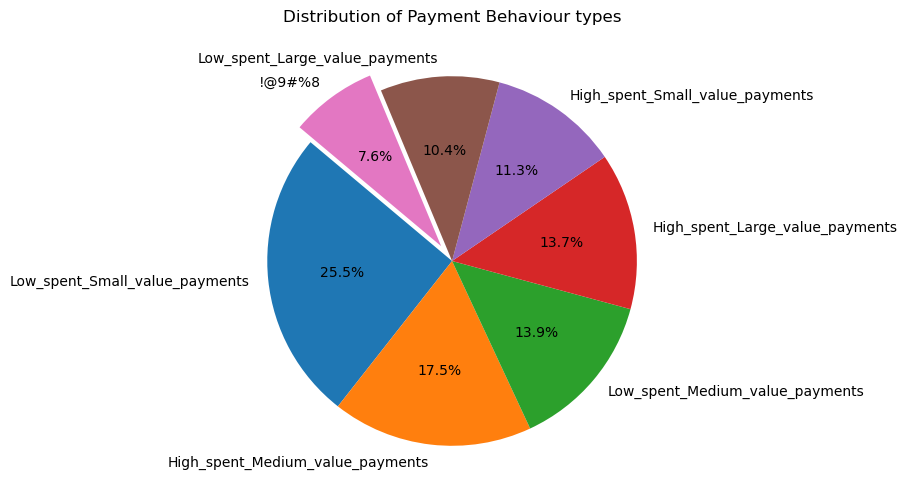

In [22]:
p_counts = df['Payment_Behaviour'].value_counts()
plt.figure(figsize=(6,6))
explode=(0.1,0,0.2)
plt.pie(p_counts, labels=p_counts.index, autopct='%1.1f%%', startangle=140,explode=(0,0,0,0,0,0,0.1))
plt.title('Distribution of Payment Behaviour types')
plt.show()

>* Around 8% are Trash values(!@9#%8)
>* Trash value !@9#%8 is replaced with np.nan

In [23]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

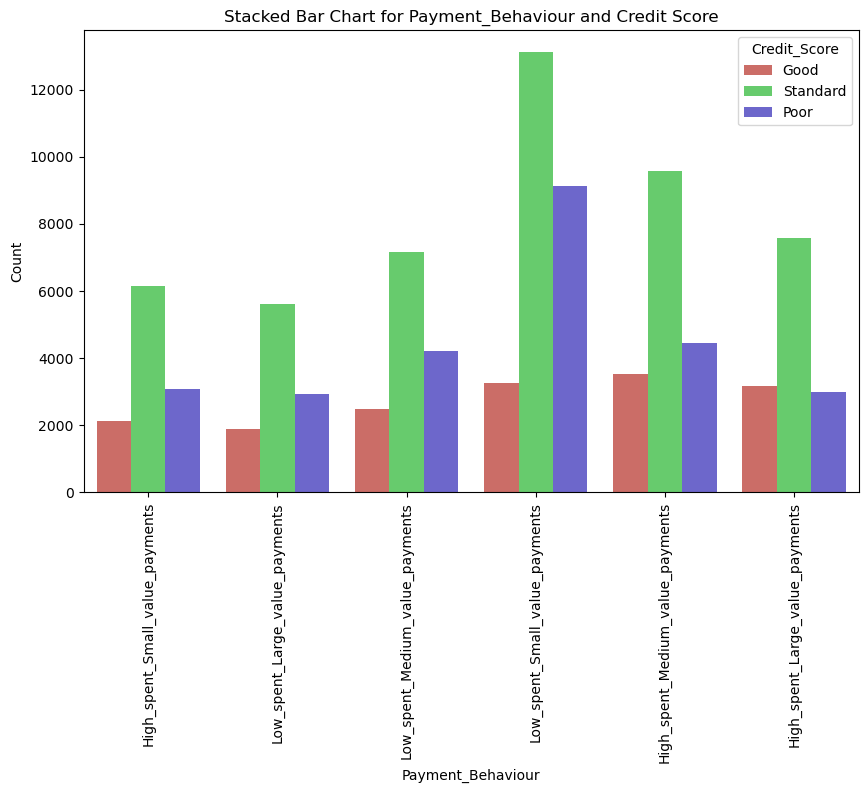

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['Payment_Behaviour'], hue='Credit_Score', palette='hls')
plt.xticks(rotation=90)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.title(f'Stacked Bar Chart for Payment_Behaviour and Credit Score')
plt.show()

### Payment_of_Min_Amount

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

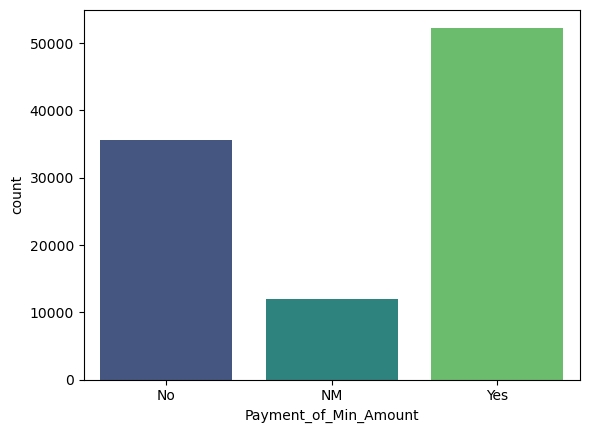

In [25]:
sns.countplot(x=df['Payment_of_Min_Amount'],palette='viridis')

In [26]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

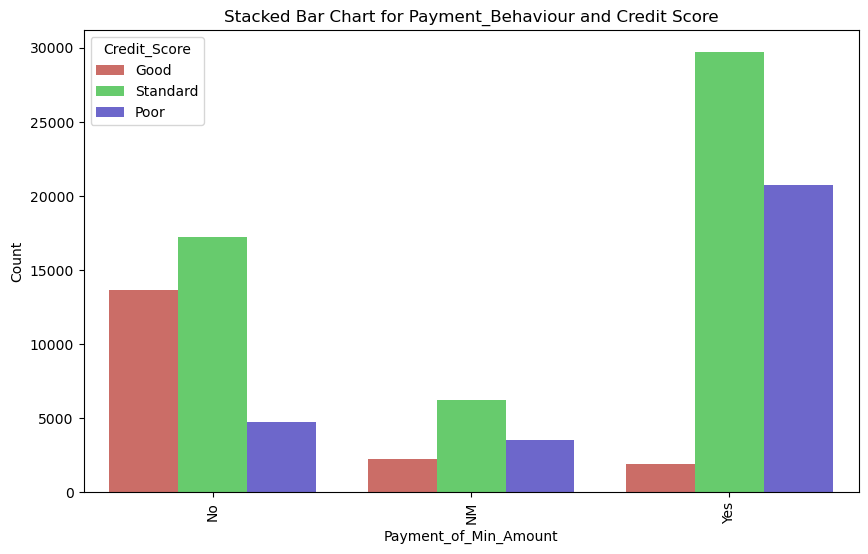

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['Payment_of_Min_Amount'], hue='Credit_Score', palette='hls')
plt.xticks(rotation=90)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.title(f'Stacked Bar Chart for Payment_Behaviour and Credit Score')
plt.show()

## Type of Loan

In [28]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [29]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

>* Null Values:
 There are 11,408 null values in the dataset. 
>* Unique Values:
 There are 6,260 unique values, representing combinations of different loans, which is expected for this dataset. 
 
> we can map the null values to "Not Specified" since this category is a suitable  for unspecified or missing     information.

### Chi-Square Test

In [30]:
chi_values=['Type_of_Loan','Payment_Behaviour']
for i in chi_values:
    contingency_table = pd.crosstab(df[i], df['Credit_Score'])
    from scipy.stats import chi2_contingency
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(i)
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    print("Degrees of Freedom:", dof)
    print('-'*50)

Type_of_Loan
Chi-Square Statistic: 65283.44808131956
P-value: 0.0
Degrees of Freedom: 12518
--------------------------------------------------
Payment_Behaviour
Chi-Square Statistic: 1430.6229135280319
P-value: 2.4231646284586113e-301
Degrees of Freedom: 10
--------------------------------------------------


>  The results show that both the type of loan and payment behavior are crucial when trying to predict credit scores. The very low P-values suggest that these factors are highly significant and not just a result of luck.

In [31]:
df['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace = True)

In [32]:
df.isna().sum()

Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### Filling categorical values with mode

In [33]:
# c=df['Credit_Mix'].mode() [0]
# print(c)
d=df['Payment_Behaviour'].mode() [0]
print(d)
e=df['Credit_History_Age'].mode() [0]
print(e)

Low_spent_Small_value_payments
15 Years and 11 Months


In [34]:
# df['Credit_Mix'].fillna(c,inplace=True)
df['Payment_Behaviour'].fillna(d,inplace=True)
df['Credit_History_Age'].fillna(e,inplace=True)

**Credit_History_Age**

In [35]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.split().apply(lambda x: int(x[0]) * 12 + int(x[3]))

> **Lambda Function**
>* The original column 'Credit_History_Age' contains values in the format "15 Years and 11 Months."
>* The .str.split() method is applied to split this string into a list of words, resulting in ['15', 'Years', 'and', '11', 'Months'].
>* A lambda function is applied using .apply() to extract numeric values.
>* The first element ('15') is converted to months (15 * 12).
>* The fourth element ('11') is added to the calculated months.
>* For example, "15 Years and 11 Months" becomes 191 months.
>* The 'Credit_History_Age' column now holds numeric values in months, ideal for analysis or modeling.

## Encoding:LabelEncoder

>The reason is that the labels suggest a certain order or ranking based on the terms
"Medium," "Large," and "Small" value payments. This implies that there is a qualitative difference in the levels of spending, 
with "Large" being higher than "Medium" and "Small." This order suggests an ordinal relationship between the categories, as they are not just nominal categories but have a meaningful hierarchy.

In [36]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lst1=['Payment_Behaviour','Payment_of_Min_Amount','Credit_Mix','Type_of_Loan']
for i in lst1:
    df[i]=lb.fit_transform(df[i])

In [37]:
df.dtypes

Age                          object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                  int32
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Payment_Behaviour             int32
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [38]:
df.isnull().sum().reset_index().rename(columns={'index':'feature name',0:'nullcount'})

feature name  nullcount
0                        Age          0
1              Annual_Income          0
2      Monthly_Inhand_Salary      15002
3          Num_Bank_Accounts          0
4            Num_Credit_Card          0
5              Interest_Rate          0
6                Num_of_Loan          0
7               Type_of_Loan          0
8        Delay_from_due_date          0
9     Num_of_Delayed_Payment       7002
10      Changed_Credit_Limit          0
11      Num_Credit_Inquiries       1965
12                Credit_Mix          0
13          Outstanding_Debt          0
14  Credit_Utilization_Ratio          0
15        Credit_History_Age          0
16     Payment_of_Min_Amount          0
17       Total_EMI_per_month          0
18         Payment_Behaviour          0
19           Monthly_Balance       1200
20              Credit_Score          0

### Numerical Variables

In [39]:
df.tail(10)

Age Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
99990  28      20002.88            1929.906667                 10   
99991  29      20002.88            1929.906667                 10   
99992  24      39628.99            3359.415833                  4   
99993  25     39628.99_            3359.415833                  4   
99994  25      39628.99            3359.415833                  4   
99995  25      39628.99            3359.415833                  4   
99996  25      39628.99            3359.415833                  4   
99997  25      39628.99            3359.415833                  4   
99998  25      39628.99            3359.415833                  4   
99999  25     39628.99_            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  Type_of_Loan  \
99990                8             29           5          4913   
99991                8             29           5          4913   
99992                6              7           2           683   
99993                6              7           2           683   
99994                6              7           2           683   
99995                6              7           2           683   
99996                6              7           2           683   
99997                6           5729           2           683   
99998                6              7           2           683   
99999                6              7           2           683   

       Delay_from_due_date Num_of_Delayed_Payment  ... Num_Credit_Inquiries  \
99990                   33                     26  ...                  9.0   
99991                   33                     25  ...                  9.0   
99992                   23                    NaN  ...                  3.0   
99993                   23                    NaN  ...                  3.0   
99994                   20                      6  ...                  3.0   
99995                   23                      7  ...                  3.0   
99996                   18                      7  ...                  3.0   
99997                   27                      6  ...                  3.0   
99998                   20                    NaN  ...                  3.0   
99999                   18                      6  ...                  3.0   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
99990           0            3571.7                25.123535   
99991           0            3571.7                37.140784   
99992           2            502.38                32.991333   
99993           1            502.38                29.135447   
99994           2            502.38                39.323569   
99995           2            502.38                34.663572   
99996           2            502.38                40.565631   
99997           1            502.38                41.255522   
99998           1            502.38                33.638208   
99999           1            502.38                34.192463   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
99990                 191                      2            60.964772   
99991                  75                      2            60.964772   
99992                 375                      1            35.104023   
99993                 376                      1         58638.000000   
99994                 377                      1            35.104023   
99995                 378                      1            35.104023   
99996                 379                      1            35.104023   
99997                 380                      1            35.104023   
99998                 381                      1            35.104023   
99999                 382                      1            35.104023   

       Payment_Behaviour     Monthly_Balance Credit_Score  
99990                  3  228.75039173328258     Standard  
99991    

> **Data Cleaning**
>* **Special Character Removal**: Eliminate any special characters at the beginning or end of data entries.
>* **Data Type Conversion**: If necessary, change the data type from 'object' to 'int' or 'float' to ensure consistency.
>* **Outlier Treatment**: Substitute outliers with the nan values,and fill with necessary methods
>* **Handling Null Values**: Replace missing values with the mean/median.

In [40]:
lst=['Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt','Monthly_Balance','Age']
for i in lst:
    df[i] = df[i].str.replace(',', '').str.replace('_', '').str.replace('-', '').str.replace('__', '').astype(float)
    df[i] = pd.to_numeric(df[i], errors='coerce')


In [41]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)

In [42]:
df.dtypes

Age                         float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                  int32
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [43]:
df.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000   1.000000e+05           84998.000000      100000.000000   
mean      119.509700   1.764157e+05            4194.170850          17.091280   
std       684.757313   1.429618e+06            3183.686167         117.404834   
min        14.000000   7.005930e+03             303.645417          -1.000000   
25%        25.000000   1.945750e+04            1625.568229           3.000000   
50%        34.000000   3.757861e+04            3093.745000           6.000000   
75%        42.000000   7.279092e+04            5957.448333           7.000000   
max      8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan   Type_of_Loan  \
count     100000.00000  100000.000000  100000.000000  100000.000000   
mean          22.47443      72.466040      10.761960    3194.687520   
std          129.05741     466.422621      61.789933    1714.425404   
min            0.00000       1.000000       0.000000       0.000000   
25%            4.00000       8.000000       2.000000    1777.750000   
50%            5.00000      13.000000       3.000000    3463.000000   
75%            7.00000      20.000000       6.000000    4553.250000   
max         1499.00000    5797.000000    1496.000000    6259.000000   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
count        100000.000000            92998.000000          97909.000000   
mean             21.068780               30.946268             10.389025   
std              14.860104              226.028754              6.789496   
min              -5.000000                0.000000             -6.490000   
25%              10.000000                9.000000              5.320000   
50%              18.000000               14.000000              9.400000   
75%              28.000000               18.000000             14.870000   
max              67.000000             4397.000000             36.970000   

       Num_Credit_Inquiries     Credit_Mix  Outstanding_Debt  \
count          98035.000000  100000.000000     100000.000000   
mean              27.754251       1.741640       1426.220376   
std              193.177339       1.140606       1155.129026   
min                0.000000       0.000000          0.230000   
25%                3.000000       1.000000        566.072500   
50%                6.000000       2.000000       1166.155000   
75%                9.000000       3.000000       1945.962500   
max             2597.000000       3.000000       4998.070000   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
count             100000.000000        100000.00000          100000.000000   
mean                  32.285173           218.46876               1.403190   
std                    5.116875            95.52431               0.693378   
min                   20.000000             1.00000               0.000000   
25%                   28.052567           154.00000               1.000000   
50%                   32.305784           208.00000               2.000000   
75%                   36.496663           292.00000               2.000000   
max                   50.000000           404.00000               2.000000   

       Total_EMI_per_month  Payment_Behaviour  Monthly_Balance  
count        100000.000000      100000.000000     9.880000e+04  
mean           1403.118217           2.925040     3.036437e+22  
std            8306.041270           1.872815     3.181295e+24  
min               0.000000           0.000000     7.759665e-03  
25%              30.306660           1.000000     2.701145e+02  
50%              69.249473           3.000000     3.367423e+02  
75%             161.224249           5.000000     4.703321e+02  
max           82331.000000           5.000000     3.333333e+26

## Outliers

Text(0.5, 1.0, 'abc')

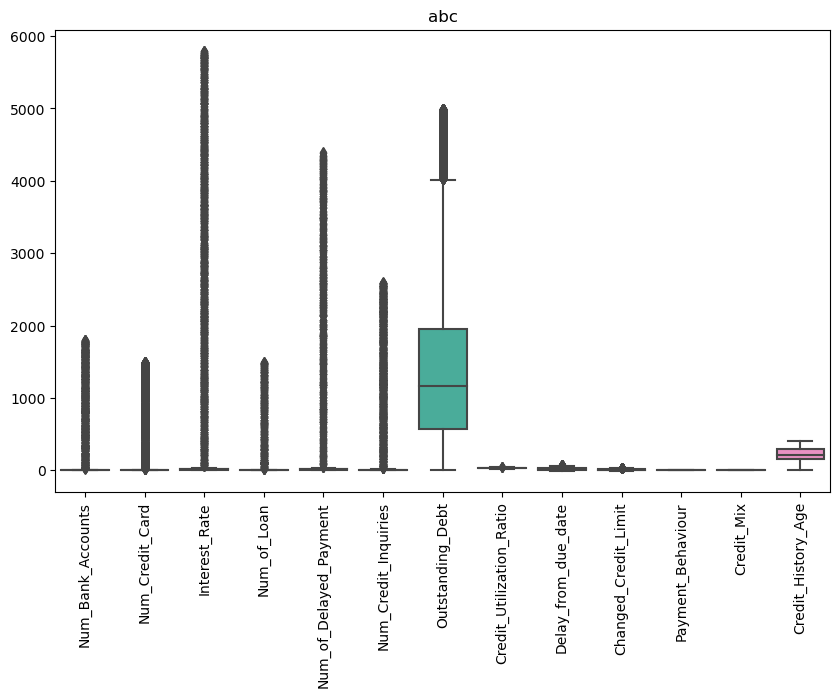

In [44]:
plt.figure(figsize=(10,6))
sx=sns.boxplot(data=[df['Num_Bank_Accounts'],df['Num_Credit_Card'],df['Interest_Rate'],df['Num_of_Loan'],df['Num_of_Delayed_Payment'],df['Num_Credit_Inquiries'],df['Outstanding_Debt'],df['Credit_Utilization_Ratio'],df['Delay_from_due_date'],df['Changed_Credit_Limit'],df['Payment_Behaviour'],df['Credit_Mix'],df['Credit_History_Age']])
sx.set_xticklabels(['Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Delay_from_due_date','Changed_Credit_Limit','Payment_Behaviour','Credit_Mix','Credit_History_Age'])
plt.xticks(rotation=90)
plt.title('abc')

<Axes: >

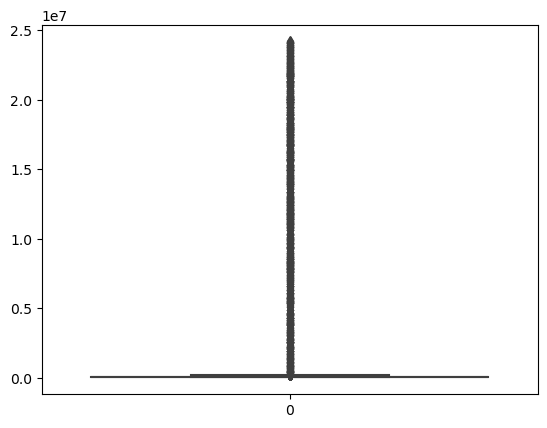

In [45]:
sns.boxplot(data=df['Annual_Income'])

<Axes: >

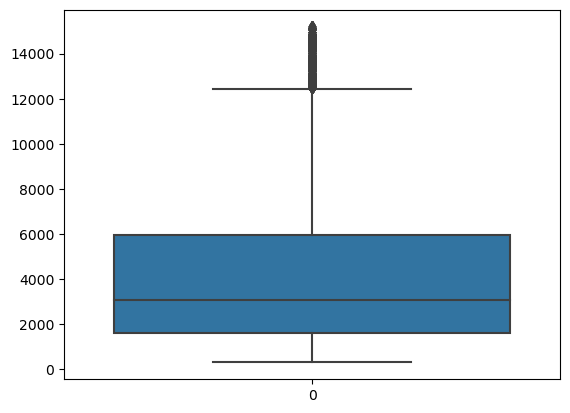

In [46]:
sns.boxplot(data=df['Monthly_Inhand_Salary'])

<Axes: >

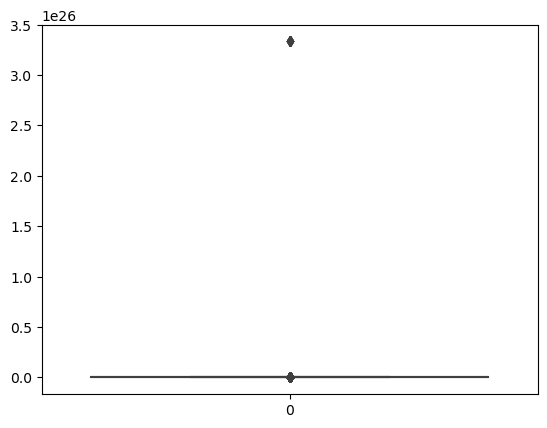

In [47]:
sns.boxplot(data=df['Monthly_Balance'])

<Axes: >

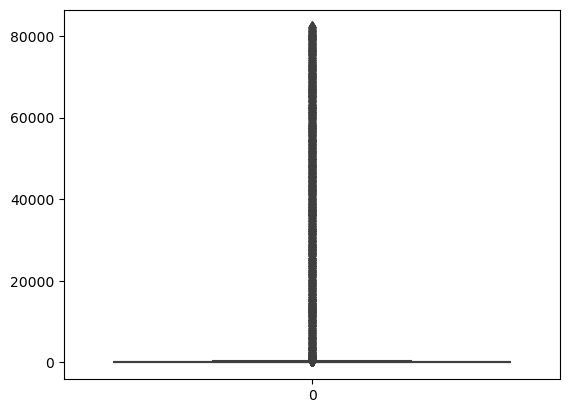

In [48]:
sns.boxplot(data=df['Total_EMI_per_month'])

<Axes: xlabel='Age'>

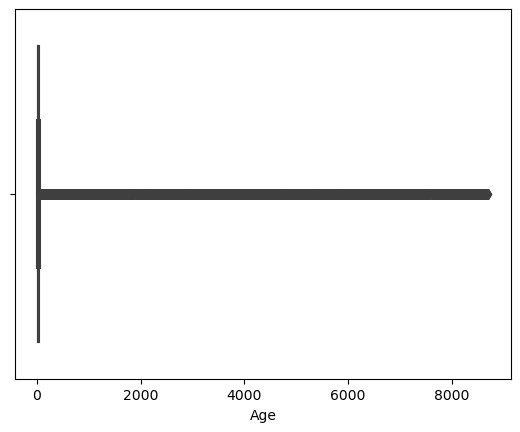

In [49]:
sns.boxplot(x=df['Age'])

## IQR METHOD

IQR (Interquartile Range) Method:

>* Purpose: Detect and handle outliers in data.  
>* Working:  
Calculate the first quartile (Q1) and third quartile (Q3).  
Compute the IQR as the difference between Q3 and Q1.  
Identify outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.  
Replace or remove outliers based on the analysis.  
>* Benefits:  
Robust method for identifying outliers.  
Maintains the original data distribution.

In [50]:
columns_to_process = ['Annual_Income','Monthly_Inhand_Salary','Total_EMI_per_month','Monthly_Balance','Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age','Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour','Delay_from_due_date','Changed_Credit_Limit','Age']
for column in columns_to_process:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = None

In [51]:
df.isna().sum()

Age                          2781
Annual_Income                2783
Monthly_Inhand_Salary       16685
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Type_of_Loan                    0
Delay_from_due_date          4002
Num_of_Delayed_Payment       7738
Changed_Credit_Limit         2759
Num_Credit_Inquiries         3615
Credit_Mix                      0
Outstanding_Debt             5272
Credit_Utilization_Ratio        4
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month          9698
Payment_Behaviour               0
Monthly_Balance              8830
Credit_Score                    0
dtype: int64

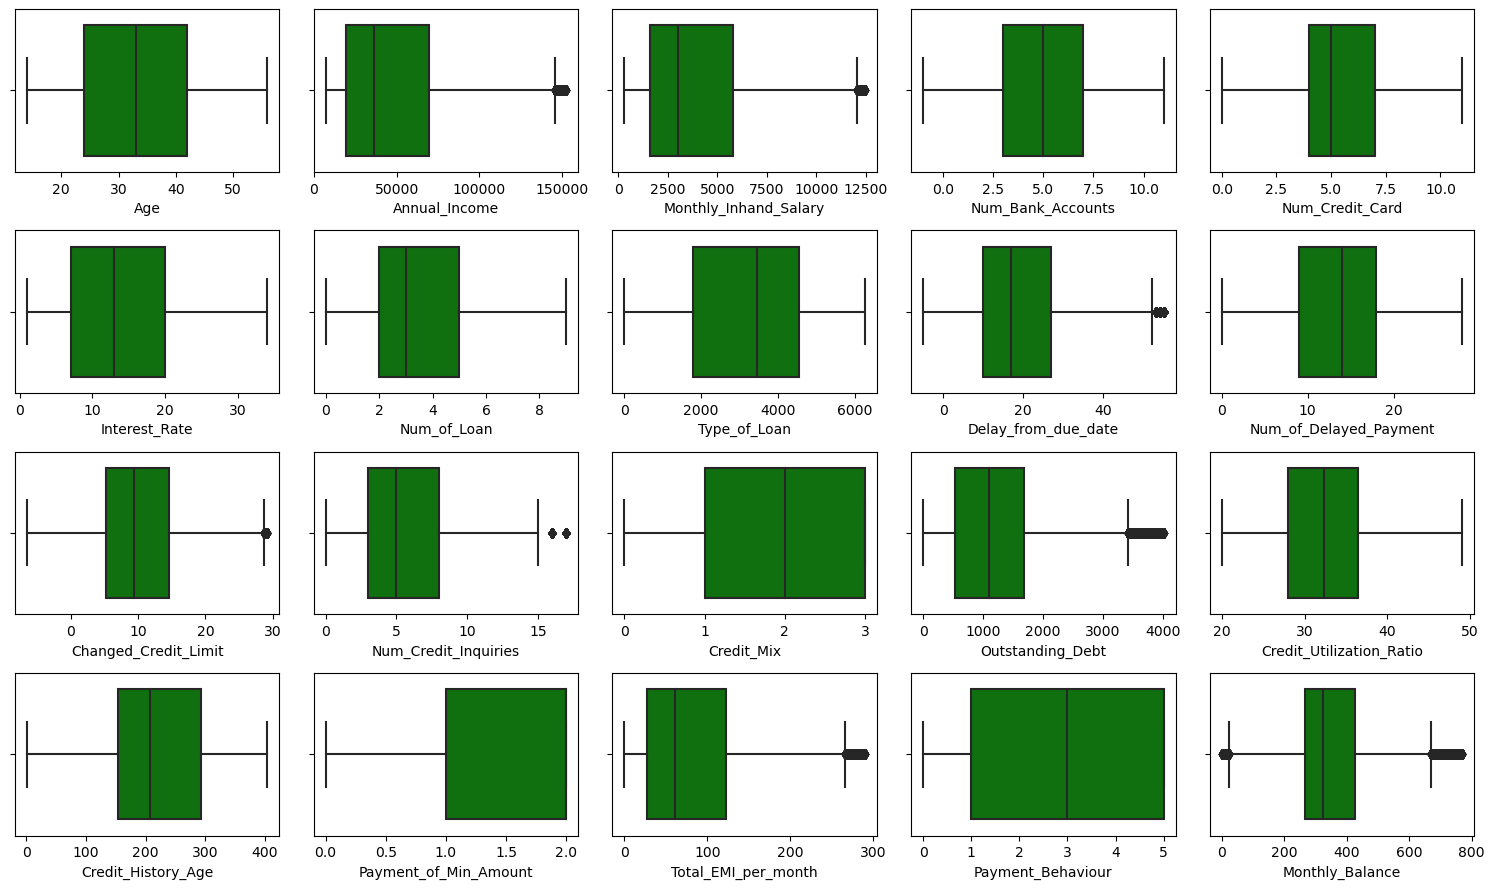

In [52]:
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(4,5,i+1)
    
    sns.boxplot(x=df[col], ax=ax,color='green')
    
fig.tight_layout()  
plt.show()

In [53]:
columns_to_process = ['Age','Annual_Income','Monthly_Inhand_Salary','Monthly_Balance', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month','Delay_from_due_date','Changed_Credit_Limit']

for column in columns_to_process:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    Q2 = df[column].quantile(0.50)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[column] > upper_bound, column] = Q3
    df.loc[df[column] < lower_bound, column] = Q1

In [54]:
df.shape

(100000, 21)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Annual_Income'),
  Text(2, 0, 'Monthly_Inhand_Salary'),
  Text(3, 0, 'Num_Bank_Accounts'),
  Text(4, 0, 'Num_Credit_Card'),
  Text(5, 0, 'Interest_Rate'),
  Text(6, 0, 'Num_of_Loan'),
  Text(7, 0, 'Type_of_Loan'),
  Text(8, 0, 'Delay_from_due_date'),
  Text(9, 0, 'Num_of_Delayed_Payment'),
  Text(10, 0, 'Changed_Credit_Limit'),
  Text(11, 0, 'Num_Credit_Inquiries'),
  Text(12, 0, 'Credit_Mix'),
  Text(13, 0, 'Outstanding_Debt'),
  Text(14, 0, 'Credit_Utilization_Ratio'),
  Text(15, 0, 'Credit_History_Age'),
  Text(16, 0, 'Payment_of_Min_Amount'),
  Text(17, 0, 'Total_EMI_per_month'),
  Text(18, 0, 'Payment_Behaviour'),
  Text(19, 0, 'Monthly_Balance')])

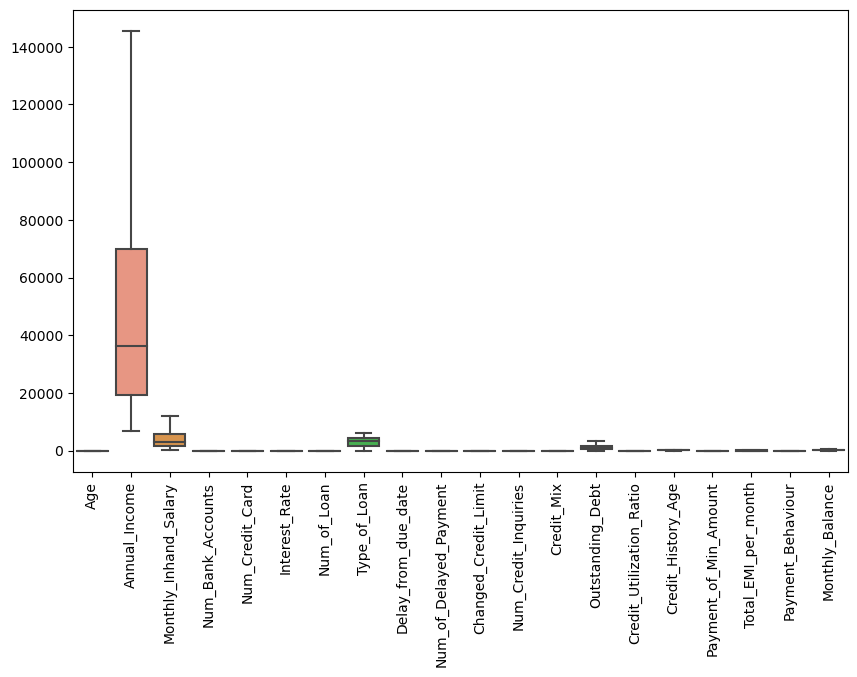

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)

## Handling missing values

In [56]:
df.isna().sum()

Age                          2781
Annual_Income                2783
Monthly_Inhand_Salary       16685
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Type_of_Loan                    0
Delay_from_due_date          4002
Num_of_Delayed_Payment       7738
Changed_Credit_Limit         2759
Num_Credit_Inquiries         3615
Credit_Mix                      0
Outstanding_Debt             5272
Credit_Utilization_Ratio        4
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month          9698
Payment_Behaviour               0
Monthly_Balance              8830
Credit_Score                    0
dtype: int64

In [57]:
removal=['Changed_Credit_Limit','Outstanding_Debt','Num_Credit_Inquiries','Num_of_Delayed_Payment','Num_Bank_Accounts','Delay_from_due_date','Age']
for r in removal:
    df[r] = df[r].apply(lambda x: x if pd.isna(x) else max(0, x))

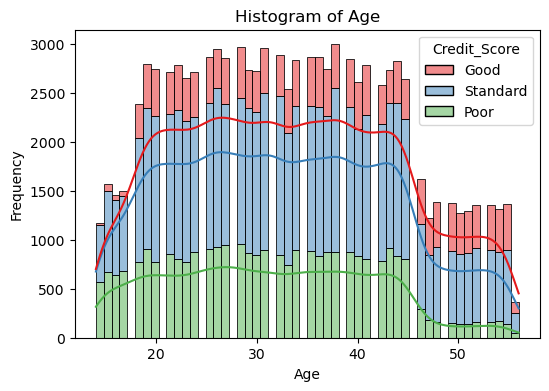

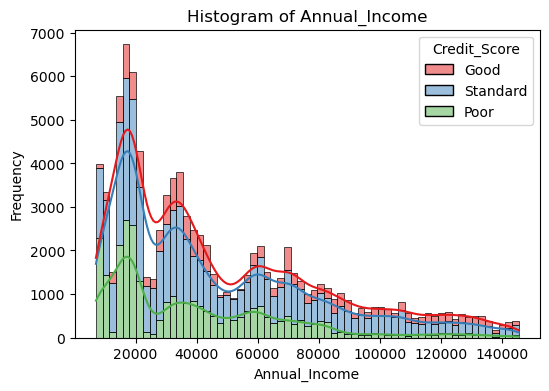

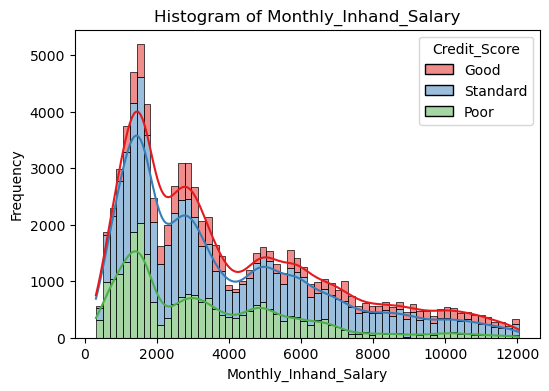

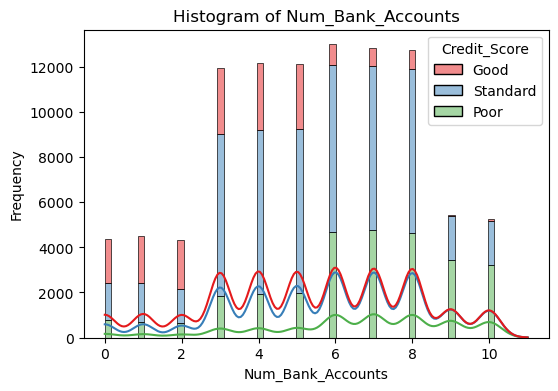

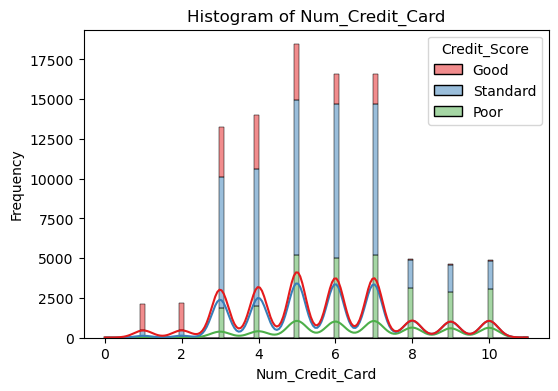

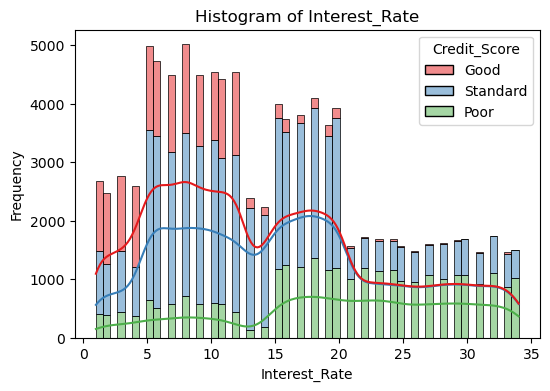

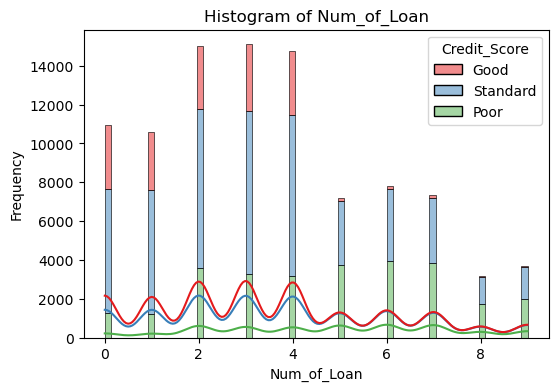

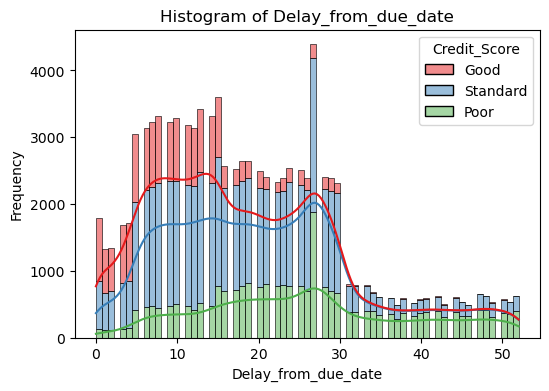

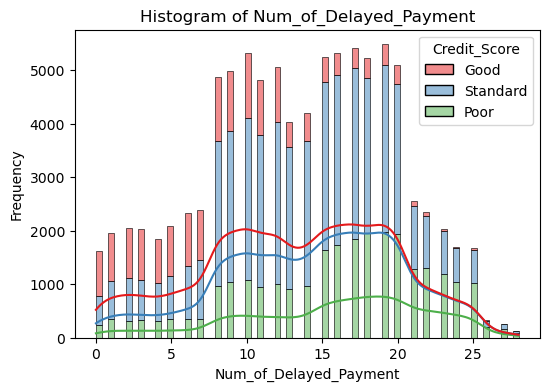

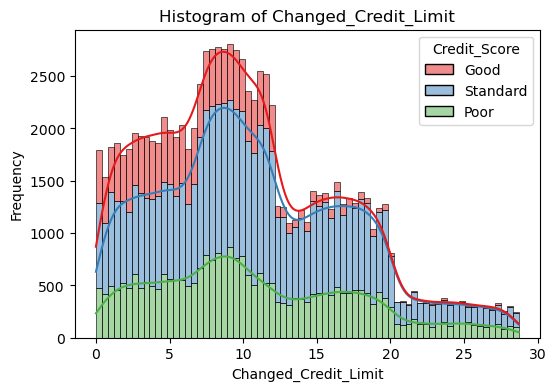

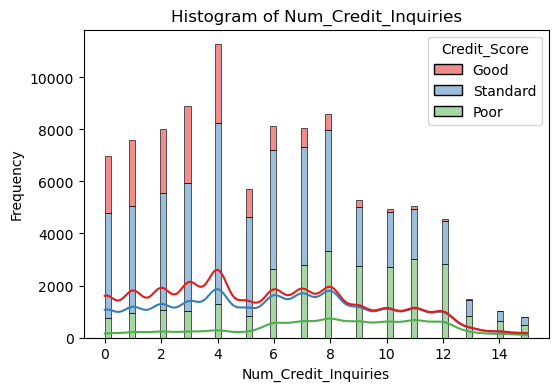

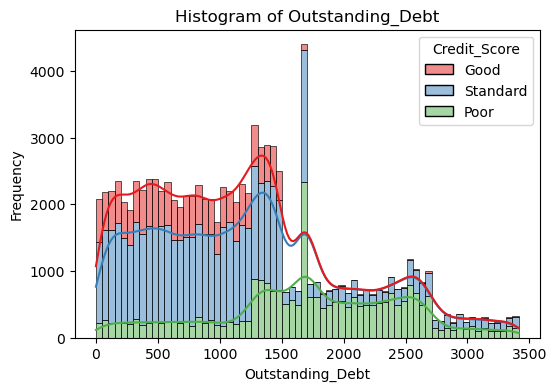

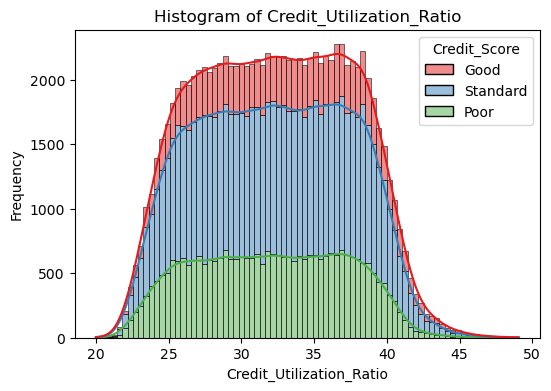

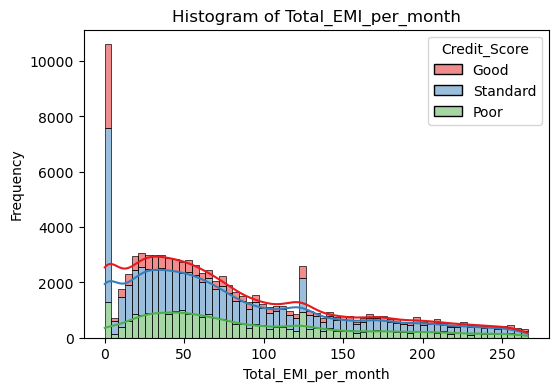

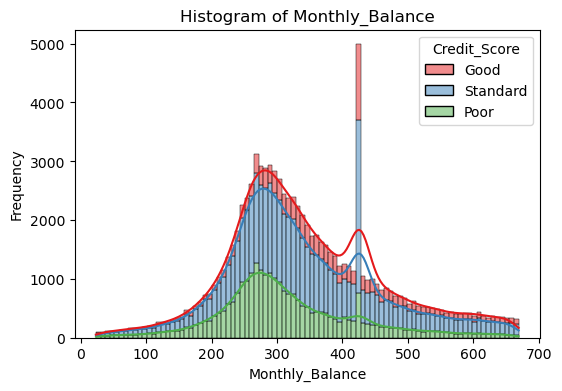

In [58]:
columns_to_plot = ['Age','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Monthly_Balance']
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, kde=True,hue="Credit_Score",multiple="stack",palette = 'Set1')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## FILLING WITH MEADIAN

**Annual Income**  
Annual Income has  null values.
Most customers have a low Annual income. Distribution is right skewed.  
**Monthly Inhand Salary**  
There are null values present.
No outliers were present for Monthly Income Salary.
Most customers have a low monthly income. Distribution is right skewed.  
**Interest_Rate**  
There are null values,Interest rate ranges from 1% to 34%,Distribution is Right skewed  
**Changed_Credit_Limit**  
There are null values,Majority distribution ranges from 0 to 15,skewed  
**Num_Credit_Inquiries**  
skewed  
**Outstanding_Debt**  
Null values,skewed  
**Total_EMI_per_month**
right skewed,values ranges from o to 300





In [59]:
new_list = ['Age','Monthly_Balance','Total_EMI_per_month','Outstanding_Debt','Num_Credit_Inquiries','Num_of_Loan','Interest_Rate','Annual_Income','Monthly_Inhand_Salary','Changed_Credit_Limit']
for j in new_list:
    median_value=df[j].median()
    print(median_value)
    df[j].fillna(median_value,inplace=True)

33.0
324.78277322193446
60.709614494607386
1100.64
5.0
3.0
13.0
36403.98
3038.445
9.36


## FILLING WITH MODE

> **Num_Bank_Accounts and Num_Credit_Card:** These columns represent counts of discrete items (bank accounts and credit cards). Using the mode ensures whole numbers, which is more appropriate.  
> **Num_of_Delayed_Payment:** It's a count of delayed payments, so the mode is ideal for maintaining whole numbers.  
> **Delay_from_due_date:** Represents a time duration. Mode is better as it preserves integer values, which are more meaningful for time durations.

In [60]:
lst2=['Num_Bank_Accounts','Num_Credit_Card','Num_of_Delayed_Payment','Delay_from_due_date']
for k in lst2:
    mode_value=df[k].mode() [0]
    print(mode_value)
    df[k].fillna(mode_value,inplace=True)

6.0
5.0
19.0
27.0


## FILLING WITH MEAN

In [61]:
mean_value=df['Credit_Utilization_Ratio'].mean()
print(mean_value)
df['Credit_Utilization_Ratio'].fillna(mean_value,inplace=True)

32.28448047989659


In [62]:
df.isna().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

>* **Outstanding Debt,Delay from due date,Interest Rate,Num Credit Card,Num Bank Accounts,
>Num of Delayed Payment**
>* When the values of "Outstanding_Debt," "Interest_Rate," and "Delay_from_due_date" etc.. increase, the number of instances with a "Bad" credit score significantly goes up. At the same time, the proportion of instances with "Standard" and "Good" credit scores becomes quite low.
>* When the values of **changed credit limit,Total emi per month** increases the proportion of standard and bad credit score increases
>* **Annual Income, Monthly Inhand Salary, Monthly Balance**
>* Conversely, when the "Annual income", Monthly inhandsalary and "Monthly Balance" increase, the number of instances with a "Bad" credit score decreases. At the same time, there is a rise in the proportion of instances with "Standard" and "Good" credit scores.
>* Interestingly, Others appears to have a similar distribution across all credit score categories. In contrast, some other features show variations and are associated with the "Standard" credit score category.

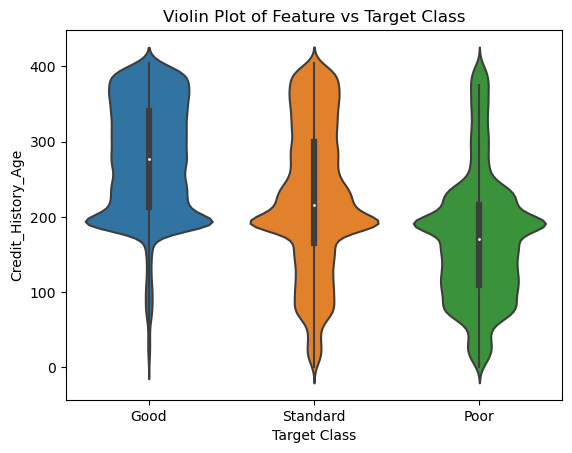

In [63]:
sns.violinplot(y='Credit_History_Age', x='Credit_Score', data=df)
plt.xlabel('Target Class')
plt.ylabel('Credit_History_Age')
plt.title('Violin Plot of Feature vs Target Class')
plt.show()

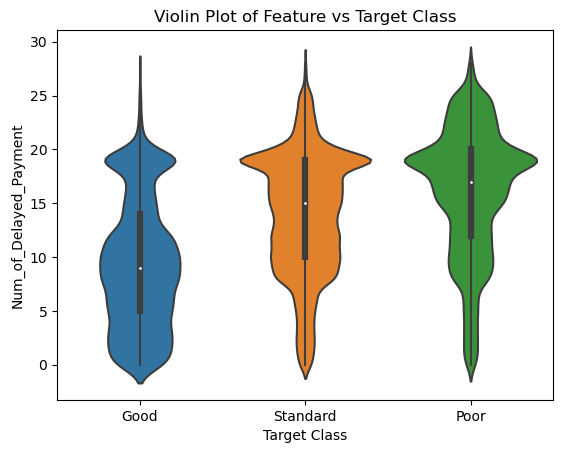

In [64]:
sns.violinplot(y='Num_of_Delayed_Payment', x='Credit_Score', data=df)
plt.xlabel('Target Class')
plt.ylabel('Num_of_Delayed_Payment')
plt.title('Violin Plot of Feature vs Target Class')
plt.show()

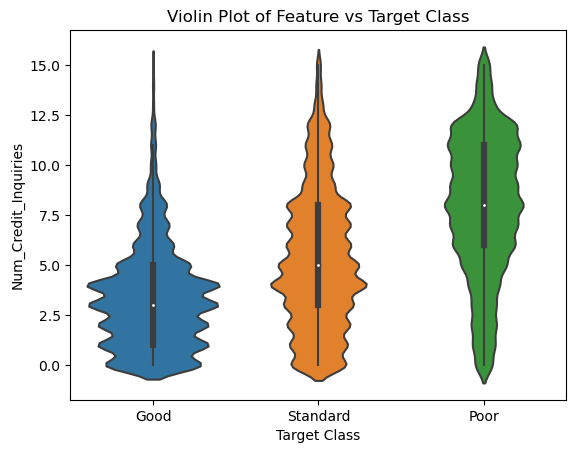

In [65]:
sns.violinplot(y='Num_Credit_Inquiries', x='Credit_Score', data=df)
plt.xlabel('Target Class')
plt.ylabel('Num_Credit_Inquiries')
plt.title('Violin Plot of Feature vs Target Class')
plt.show()

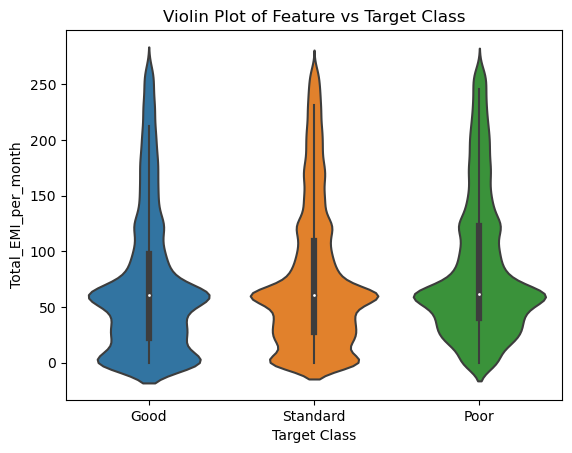

In [66]:
sns.violinplot(y='Total_EMI_per_month', x='Credit_Score', data=df)
plt.xlabel('Target Class')
plt.ylabel('Total_EMI_per_month')
plt.title('Violin Plot of Feature vs Target Class')
plt.show()

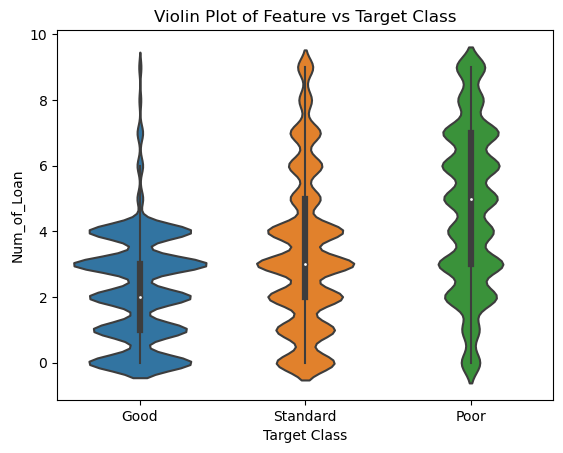

In [67]:
sns.violinplot(y='Num_of_Loan', x='Credit_Score', data=df)
plt.xlabel('Target Class')
plt.ylabel('Num_of_Loan')
plt.title('Violin Plot of Feature vs Target Class')
plt.show()

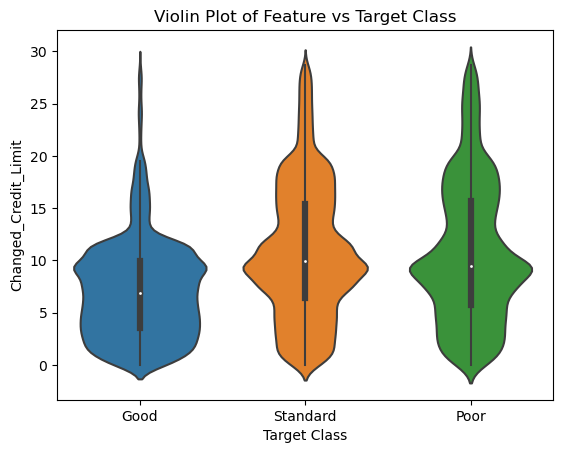

In [68]:
sns.violinplot(y='Changed_Credit_Limit', x='Credit_Score', data=df)
plt.xlabel('Target Class')
plt.ylabel('Changed_Credit_Limit')
plt.title('Violin Plot of Feature vs Target Class')
plt.show()

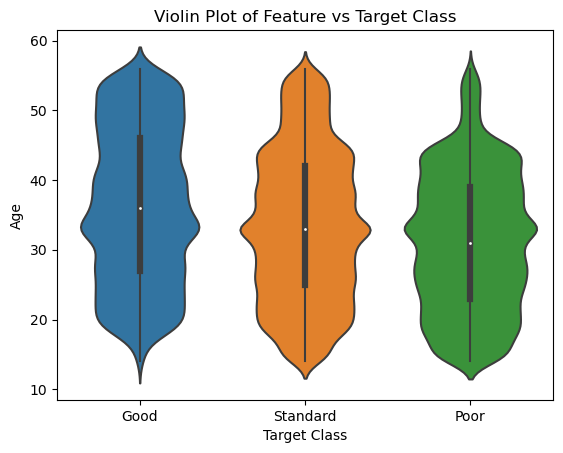

In [69]:
sns.violinplot(y='Age', x='Credit_Score', data=df)
plt.xlabel('Target Class')
plt.ylabel('Age')
plt.title('Violin Plot of Feature vs Target Class')
plt.show()

> **As the variables Num_of_Delayed_Payment, Num_Credit_Inquiries, Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan values increases the proportion of poor credit scores increases, while good and standard credit scores instances were quite less.
Num_of_Delayed_Payment variable having the most visible effect.  
Credit_History_Age increases proportion of good and standard credit score increases  
People aged 45 to 60 generally exhibit a positive trend in their credit scores.  
Responsible financial decisions, such as timely bill payments and debt management, contribute to their high credit scores**



In [70]:
df['Credit_Score'] = df['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good': 2})

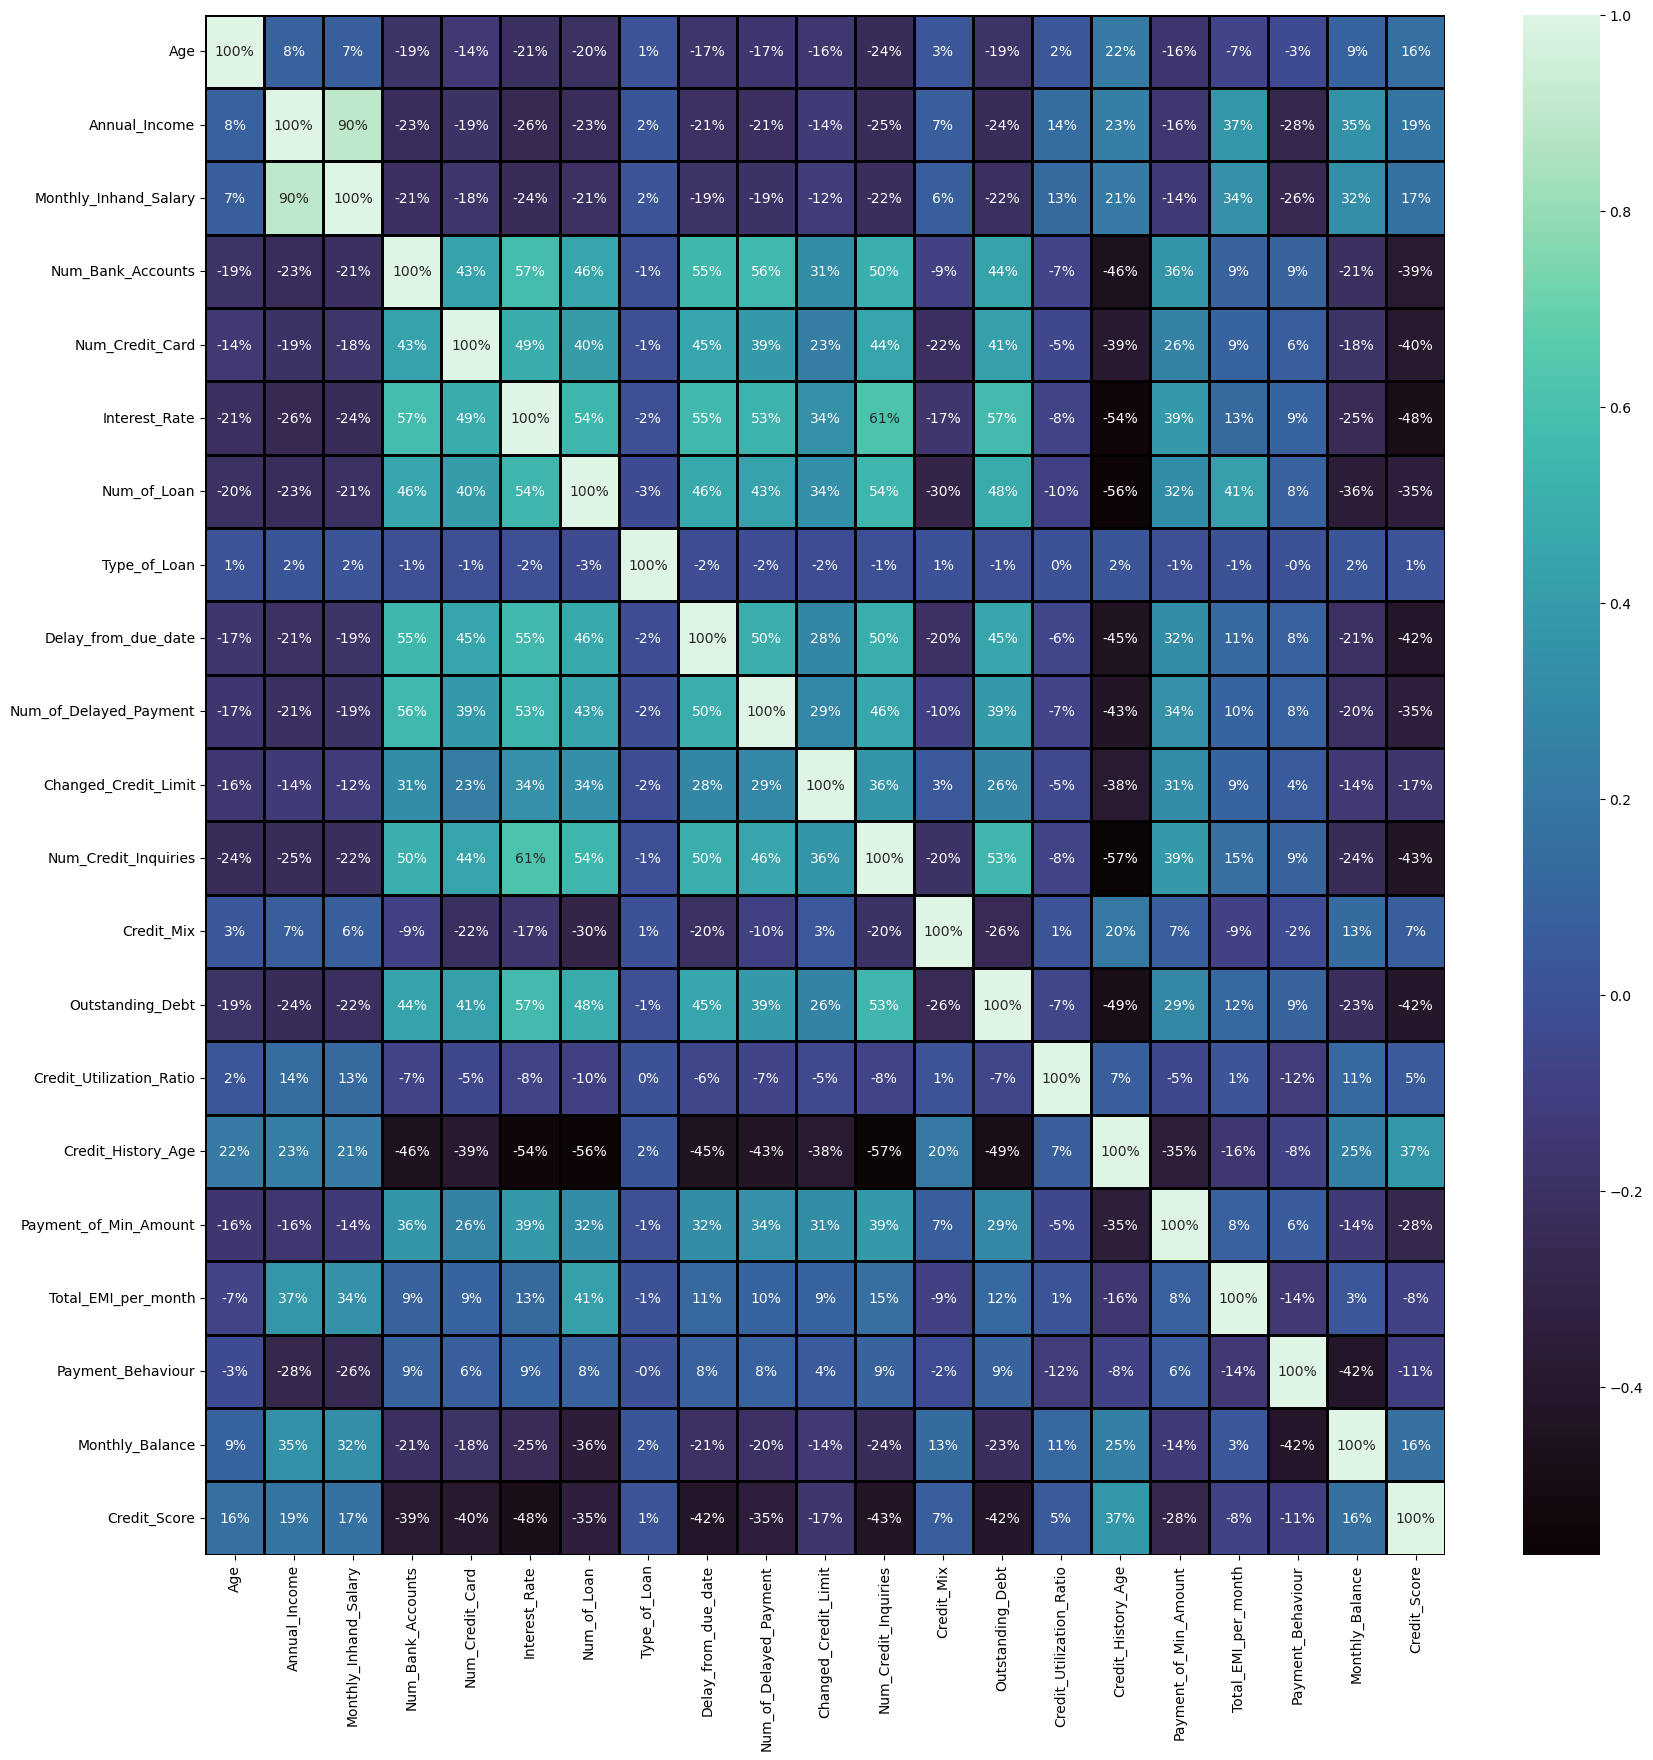

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='mako',linecolor='black',linewidth=1,fmt=".0%")
plt.show()

> - The heatmap visualization of our dataset reveals a strong correlation of 90% between the 'Annual Income' and 'Monthly Salary' features.
> - High correlation between variables can lead to multicollinearity, which may impact the accuracy and stability of predictive models.
> - This decision aims to enhance the effectiveness of our machine learning models by reducing redundancy and the risk of overfitting due to the presence of highly correlated features.
>- Removing 'Monthly Inhand Salary' ensures that our models can focus on the most relevant information and make more accurate predictions.


In [72]:
df1 = df.drop(['Monthly_Inhand_Salary'], axis=1)


## Credit Score

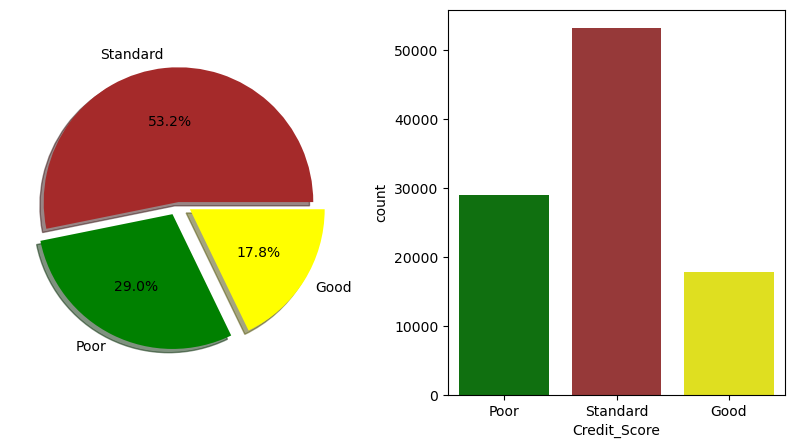

In [73]:
plt.figure(figsize=(10,5))
label_count = df['Credit_Score'].value_counts().values
label = df['Credit_Score'].value_counts().index

plt.subplot(1, 2, 1)
explode=(0,0.1,0.1)
colors = ['brown', 'green', 'yellow']
labels = ['Standard', 'Poor', 'Good']
plt.pie(x=label_count, labels=labels, autopct='%1.1f%%', shadow=True, radius=1, colors=colors,explode=explode)

plt.subplot(1, 2, 2)
colors = [ 'green', 'brown','yellow']
sns.countplot(x=df['Credit_Score'],palette=colors)
plt.xticks([0, 1, 2], ['Poor', 'Standard', 'Good'])
plt.subplots_adjust(wspace=0.3)
plt.show()

### > There are 3 different types credit score : Standard,Good & Poor
>  * Standard: Approximately 53% of individuals have a Standard credit score.
>  * Poor: Around 29% of individuals have a Poor credit score.
>  * Good: Roughly 17% of individuals have a Good credit score.
>  * When creating a model with "Credit Score" as the target, the uneven distribution of categories can impact model results. To      address this, techniques like oversampling, undersampling, and alternative evaluation methods should be considered based on      the business goal.


* Resampling Techniques:  
Oversampling: Increase minority class instances.  
Undersampling: Decrease majority class instances.  
SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic examples for the minority class.  

* Different Algorithms:  
Use algorithms like Random Forest and Gradient Boosting.  

* Ensemble Methods:  
Utilize Balanced Random Forest or EasyEnsemble.  

* Evaluation Metrics:  
Prefer metrics like precision, recall, F1-score etc

### SMOTE(Synthetic Minority Over-sampling Technique):

>**SMOTE is a valuable tool for improving the performance of machine learning models when dealing with imbalanced datasets**  
>* Purpose: 
>Addressing class imbalance in datasets, particularly in machine learning classification tasks.  
>* Working:  
Identifies minority class instances.  
Selects a minority class instance and one or more of its k-nearest neighbors.  
Creates synthetic samples along the line segments connecting these instances.  
Balances the class distribution by increasing the number of minority class samples.  
>* Benefits:  
Helps models generalize better on imbalanced datasets.  
Reduces the risk of biased predictions towards the majority class.  

In [74]:
x=df1.iloc[:,:-1]
x

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0      23.0       19114.12                3.0              4.0            3.0   
1      23.0       19114.12                3.0              4.0            3.0   
2      33.0       19114.12                3.0              4.0            3.0   
3      23.0       19114.12                3.0              4.0            3.0   
4      23.0       19114.12                3.0              4.0            3.0   
...     ...            ...                ...              ...            ...   
99995  25.0       39628.99                4.0              6.0            7.0   
99996  25.0       39628.99                4.0              6.0            7.0   
99997  25.0       39628.99                4.0              6.0           13.0   
99998  25.0       39628.99                4.0              6.0            7.0   
99999  25.0       39628.99                4.0              6.0            7.0   

       Num_of_Loan  Type_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              4.0           128                  3.0                     7.0   
1              4.0           128                  0.0                    19.0   
2              4.0           128                  3.0                     7.0   
3              4.0           128                  5.0                     4.0   
4              4.0           128                  6.0                    19.0   
...            ...           ...                  ...                     ...   
99995          2.0           683                 23.0                     7.0   
99996          2.0           683                 18.0                     7.0   
99997          2.0           683                 27.0                     6.0   
99998          2.0           683                 20.0                    19.0   
99999          2.0           683                 18.0                     6.0   

       Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  \
0                     11.27                   4.0           2   
1                     11.27                   4.0           1   
2                      9.36                   4.0           1   
3                      6.27                   4.0           1   
4                     11.27                   4.0           1   
...                     ...                   ...         ...   
99995                 11.50                   3.0           2   
99996                 11.50                   3.0           2   
99997                 11.50                   3.0           1   
99998                 11.50                   3.0           1   
99999                 11.50                   3.0           1   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0                809.98                 26.822620               265.0   
1                809.98                 31.944960               191.0   
2                809.98                 28.609352               267.0   
3                809.98                 31.377862               268.0   
4                809.98                 24.797347               269.0   
...                 ...                       ...                 ...   
99995            502.38                 34.663572               378.0   
99996            502.38                 40.565631               379.0   
99997            502.38                 41.255522               380.0   
99998            502.38                 33.638208               381.0   
99999            502.38                 34.192463               382.0   

       Payment_of_Min_Amount  Total_EMI_per_month  Payment_Behaviour  \
0                        1.0            49.574949                2.0   
1                        1.0            49.574949                3.0   
2                        1.0            49.574949                4.0   
3                        1.0            49.574949                5.0   
4                        1.0            49.5

In [75]:
y=df1.iloc[:,-1]
y

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [76]:
x.shape

(100000, 19)

In [77]:
y.shape

(100000,)

In [78]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(x, y)

In [79]:
print(x_resample.shape)
print(y_resample.shape)

(159522, 19)
(159522,)


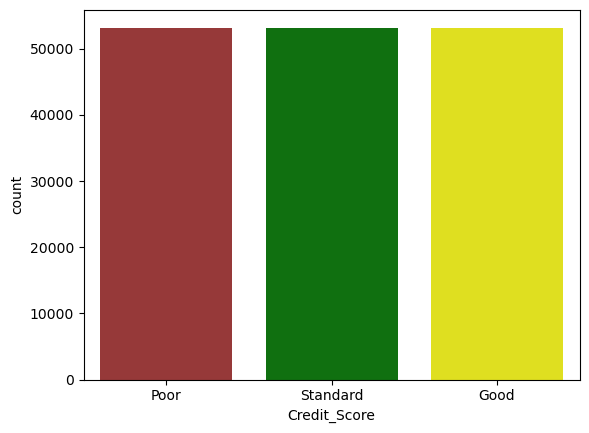

In [80]:
colors = ["brown", "green", "yellow"]
sns.countplot(x=y_resample,palette=colors)
plt.xticks([0, 1, 2], ['Poor', 'Standard', 'Good'])
plt.show()

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(x_resample,y_resample)

ExtraTreesClassifier()

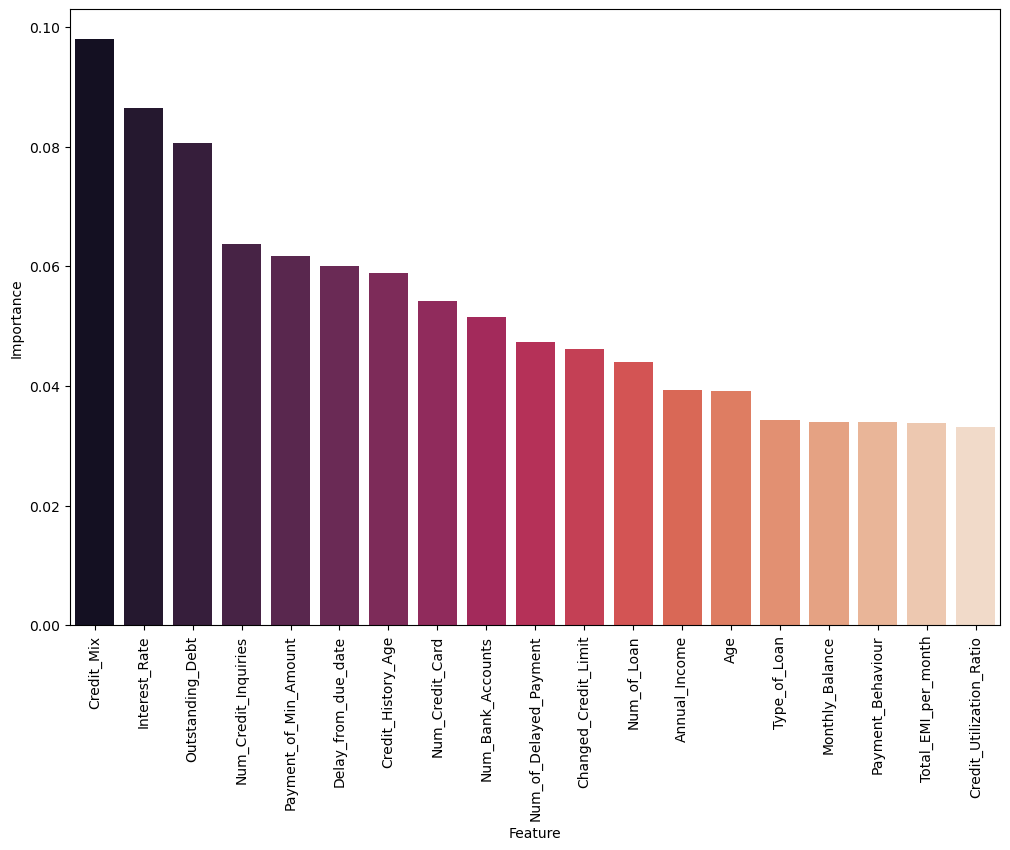

In [82]:
plt.figure(figsize=(12, 8))

feat_importances = pd.Series(selection.feature_importances_, index=x_resample.columns)
top_features = feat_importances.nlargest(20)
sns.barplot(x=top_features.index, y=top_features.values, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_resample,y_resample,test_size=0.30,random_state=42)

In [84]:
xtrain

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
59795   52.000000      16792.325           1.000000         4.000000   
77298   42.000000      30617.500           9.000000         7.000000   
366     16.000000      55829.790          10.000000        10.000000   
105941  21.159916      16266.910           9.000000         9.000000   
83604   28.000000      57654.400           4.000000         6.000000   
...           ...            ...                ...              ...   
119879  18.000000      81744.760          10.000000         6.000000   
103694  23.244835      47050.410           3.734504         7.000000   
131932  24.000000      28195.290           3.000000         4.659718   
146867  48.147756      19462.925           1.000000         1.000000   
121958  18.000000       8628.610           9.000000         5.000000   

        Interest_Rate  Num_of_Loan  Type_of_Loan  Delay_from_due_date  \
59795        5.000000          3.0          2920             6.000000   
77298       20.000000          6.0          6048            27.000000   
366         18.000000          8.0          5856            30.000000   
105941      28.000000          2.0          5584            32.000000   
83604       10.000000          2.0          3454            17.000000   
...               ...          ...           ...                  ...   
119879      15.000000          7.0          3925            51.000000   
103694      14.469008          5.0          1428            22.489669   
131932      11.000000          3.0            65            12.638870   
146867       8.000000          4.0            71             8.147756   
121958      18.000000          4.0          4892            50.000000   

        Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
59795                 0.000000              3.330000              5.000000   
77298                19.000000             13.160000             12.000000   
366                  15.000000             27.990000             11.000000   
105941               16.479747              2.700000              9.000000   
83604                16.000000             19.710000              9.000000   
...                        ...                   ...                   ...   
119879               22.543353             18.450000             12.000000   
103694               18.000000             14.280331              5.000000   
131932                5.000000              4.040000              8.000000   
146867               12.147756              5.510000              3.591025   
121958               16.000000              9.300000             10.000000   

        Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
59795            1            161.57                 37.805425   
77298            2           2058.93                 30.049405   
366              0           1689.38                 30.836960   
105941           0           2125.88                 34.177035   
83604            3            573.53                 23.071076   
...            ...               ...                       ...   
119879           0           2196.59                 36.588587   
103694           3           1594.93                 27.467693   
131932           1           1281.29                 31.835800   
146867           1            160.30                 30.008345   
121958           0           1559.93                 25.155181   

        Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
59795           335.000000               1.000000            29.147962   
77298           168.000000               2.000000           108.932199   
366             191.000000               0.000000            60.709614   
105941          197.119409               2.000000            23.054674   
83604           126.000000               2.000000            53.036046   
...                    ...                    ...                  ...   
119879           97.5433

In [85]:
xtest

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
19930   33.0      23200.820           3.000000              7.0   
75724   30.0      43391.960           1.000000              5.0   
51506   20.0      42395.160           1.000000              5.0   
97010   25.0      16934.760           4.000000              3.0   
39363   50.0      53876.660           3.000000              4.0   
...      ...            ...                ...              ...   
58772   33.0      14021.495           7.000000              5.0   
115634  30.0      32488.700           7.000000              7.0   
88189   33.0       7517.970           6.000000              9.0   
137415  36.0      36403.980           5.778151              5.0   
85337   28.0      28207.030           8.000000              7.0   

        Interest_Rate  Num_of_Loan  Type_of_Loan  Delay_from_due_date  \
19930        5.000000          0.0          3463                 29.0   
75724       10.000000          0.0          3463                  6.0   
51506        8.000000          4.0          2443                  2.0   
97010        7.000000          5.0          3930                 30.0   
39363       13.000000          0.0          3463                 19.0   
...               ...          ...           ...                  ...   
58772       13.000000          3.0          2097                 30.0   
115634      15.869986          6.0          2557                 52.0   
88189       31.000000          6.0          5457                  7.0   
137415       6.000000          1.0             0                 15.0   
85337       10.000000          0.0          3463                 23.0   

        Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
19930                15.000000             21.730000                   5.0   
75724                 6.000000             10.720000                   0.0   
51506                 2.000000              9.400000                   2.0   
97010                13.000000             11.320000                   7.0   
39363                14.000000              0.000000                   3.0   
...                        ...                   ...                   ...   
58772                14.000000             11.190000                  11.0   
115634                9.760834              8.340000                  12.0   
88189                14.000000             11.310000                   8.0   
137415                7.778151              3.906301                   3.0   
85337                 9.000000             15.480000                   8.0   

        Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
19930            3            987.07                 32.003693   
75724            1           1468.28                 38.234839   
51506            1            940.91                 41.531669   
97010            3            304.61                 37.326224   
39363            3            808.80                 32.307084   
...            ...               ...                       ...   
58772            3            263.51                 31.378582   
115634           2           2561.04                 37.473200   
88189            3           1504.72                 29.860238   
137415           1            810.80                 35.231043   
85337            3           1406.85                 30.866814   

        Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
19930           210.000000               2.000000             0.000000   
75724           287.000000               1.000000             0.000000   
51506           191.000000               0.000000           135.018683   
97010            83.000000               2.000000            52.813538   
39363           286.000000               1.000000             0.000000   
...                    ...                    ...                  ...   
58772           191.000000               2.000000            13.546538   
11563

In [86]:
ytrain

59795     2
77298     0
366       0
105941    0
83604     1
         ..
119879    0
103694    0
131932    2
146867    2
121958    0
Name: Credit_Score, Length: 111665, dtype: int64

In [87]:
ytest

19930     1
75724     1
51506     2
97010     1
39363     1
         ..
58772     1
115634    0
88189     0
137415    2
85337     1
Name: Credit_Score, Length: 47857, dtype: int64

## SCALING/NORMALISATION

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [89]:
xtrain

array([[ 1.72861277, -0.92474947, -1.54522662, ..., -0.7478818 ,
         1.18924168, -0.6179467 ],
       [ 0.78278784, -0.52235521,  1.4646436 , ...,  0.49943483,
         1.18924168, -0.48329508],
       [-1.67635698,  0.21147136,  1.84087737, ..., -0.25445885,
         1.18924168, -1.15314597],
       ...,
       [-0.91969704, -0.59285583, -0.79275907, ...,  1.11516613,
         0.42398891, -0.05872547],
       [ 1.36425796, -0.84701923, -1.54522662, ..., -0.23165499,
        -1.20649522, -0.11761246],
       [-1.48719199, -1.1623618 ,  1.4646436 , ..., -0.78080177,
         1.18924168, -0.59604374]])

In [90]:
xtest

array([[-0.0684546 , -0.73822441, -0.79275907, ..., -1.20357004,
        -1.05963339,  0.31697724],
       [-0.35220208, -0.15054296, -1.54522662, ..., -1.20357004,
         1.18924168, -0.3378108 ],
       [-1.29802701, -0.17955573, -1.54522662, ...,  0.90726108,
        -0.49741462,  0.60076042],
       ...,
       [-0.0684546 , -1.19468798,  0.33594226, ..., -0.62832296,
        -0.49741462, -0.92066843],
       [ 0.21529288, -0.35393446,  0.25247503, ..., -0.17856493,
        -1.12294059, -0.19227399],
       [-0.54136706, -0.59251413,  1.08840982, ..., -1.20357004,
         0.06480415,  0.47371286]])

## ALGORITHAM

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier.fit(xtrain, ytrain)
ypred = rf_classifier.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("RANDOM FOREST Accuracy:", accuracy)

print(classification_report(ytest,ypred))



RANDOM FOREST Accuracy: 0.8516413481831289
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     16014
           1       0.85      0.74      0.79     15952
           2       0.84      0.93      0.88     15891

    accuracy                           0.85     47857
   macro avg       0.85      0.85      0.85     47857
weighted avg       0.85      0.85      0.85     47857



In [92]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[14175  1080   759]
 [ 2169 11780  2003]
 [  130   959 14802]]


## Confusion Matrix

>  A confusion matrix is an N X N matrix that is used to evaluate the performance of a classification model, where N is the number of target classes. It compares the actual target values against the ones predicted by the ML model.

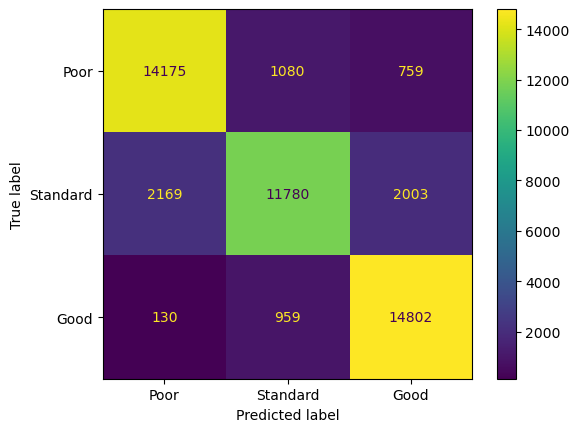

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
labels=['Poor','Standard','Good']
result=confusion_matrix(ytest,ypred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(xtrain,ytrain)
ypred1 =knn_classifier.predict(xtest)
print('KNN Accuracy',accuracy_score(ytest,ypred1))
print(classification_report(ytest,ypred1))


KNN Accuracy 0.8201725975301419
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     16014
           1       0.84      0.63      0.72     15952
           2       0.83      0.94      0.88     15891

    accuracy                           0.82     47857
   macro avg       0.82      0.82      0.81     47857
weighted avg       0.82      0.82      0.81     47857



In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred1))

[[14388  1178   448]
 [ 3290  9990  2672]
 [  310   708 14873]]


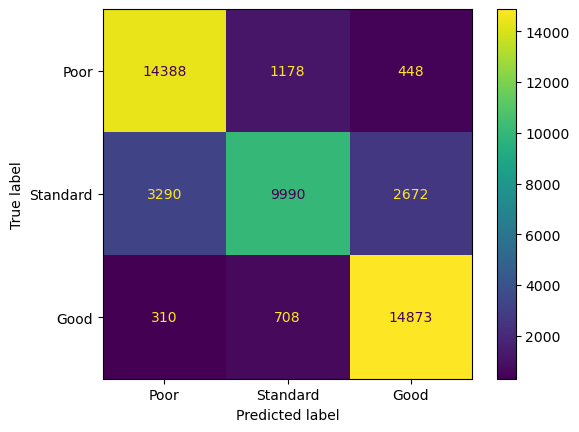

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
labels=['Poor','Standard','Good']
result=confusion_matrix(ytest,ypred1)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

>*  Balanced Precision and Recall: If we want a balance between precision and recall and don't favor one over the other, we might prefer RANDOM FOREST because it generally has higher F1-scores for all classes. It achieves a better balance between precision and recall.  
>* High Precision: If precision is more critical to us (e.g., minimizing false positives is crucial), then we might prefer RANDOM FOREST because it generally has higher precision values for all classes.  
>* High Recall: If recall is more important (e.g., capturing as many true positives as possible), then Random forest has higher recall values for two out of three classes (Good and Poor).  
>* Accuracy: If overall accuracy is our primary concern, then RANDOM FOREST has a higher accuracy score (0.85) compared to KNN (0.81).  
>* Ultimately, the "best" set of metrics depends on your specific use case and goals. In our condition Random forest performs in all aspects so we can consider random forest as the best model 

> Based on our model, it is possible to predict the score of an individual based on specific attributes. We tried and tested multiple models out of which the Random Forest Model worked the best with an accuracy of 85% based on limited selected features. We evaluated the model using a classfication report on which it scored around the same for all metrics. We analyzed the model further by performing feature engineering to understand which features play important roles in predicting the credit score.

In [99]:
rf_classifier.feature_importances_

array([0.03760128, 0.04531628, 0.04199209, 0.03958555, 0.10640831,
       0.03133416, 0.03667691, 0.06896931, 0.04017366, 0.05177826,
       0.04652392, 0.07382694, 0.1073424 , 0.03977285, 0.06620176,
       0.05836955, 0.0357526 , 0.03342833, 0.03894586])

In [100]:
df2=pd.DataFrame({'feature':x.columns,'importances':rf_classifier.feature_importances_})

In [101]:
df2.sort_values(by='importances')

feature  importances
5                Num_of_Loan     0.031334
17         Payment_Behaviour     0.033428
16       Total_EMI_per_month     0.035753
6               Type_of_Loan     0.036677
0                        Age     0.037601
18           Monthly_Balance     0.038946
3            Num_Credit_Card     0.039586
13  Credit_Utilization_Ratio     0.039773
8     Num_of_Delayed_Payment     0.040174
2          Num_Bank_Accounts     0.041992
1              Annual_Income     0.045316
10      Num_Credit_Inquiries     0.046524
9       Changed_Credit_Limit     0.051778
15     Payment_of_Min_Amount     0.058370
14        Credit_History_Age     0.066202
7        Delay_from_due_date     0.068969
11                Credit_Mix     0.073827
4              Interest_Rate     0.106408
12          Outstanding_Debt     0.107342

Text(0.5, 1.0, 'feature importances from random forest')

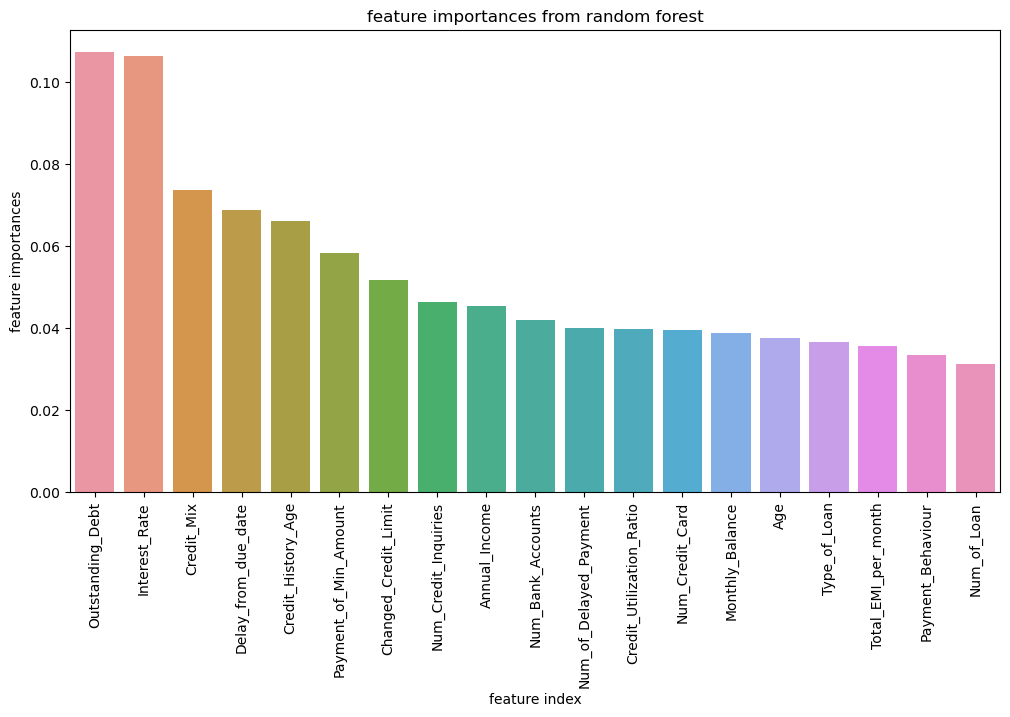

In [102]:
plt.figure(figsize=(12,6))
df2_sorted = df2.sort_values(by='importances', ascending=False)
sns.barplot(x=df2['feature'],y=df2_sorted['importances'], order=df2_sorted['feature'])
plt.xticks(rotation=90)
plt.xlabel('feature index')
plt.ylabel('feature importances')
plt.title('feature importances from random forest')

>In short, when it comes to predicting credit scores, factors like outstanding debt, credit history,credit mix  Delay from due date and interest rates matter the most. Payment behaviour ,num of loan and total emi per month have a lesser impact on your credit score.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
kfold = KFold(n_splits=4, shuffle=True, random_state=42)


In [103]:
#  scores = cross_val_score(rf_classifier, xtrain, ytrain, cv=kfold, scoring='accuracy')


In [104]:
# print("Cross-validation scores:", scores)
# print("Mean accuracy:", scores.mean())
# print("Standard deviation:", scores.std())

## Conclusion


 >   - **Successfully developed a credit score classification model that can assist financial institutions in making informed lending decisions.**
 >  - **Improved data quality and addressed issues related to missing values, data types, and special characters.**